# My Kaggle profile: 

https://www.kaggle.com/kosovanolexandr

### My kerenel:

https://www.kaggle.com/kosovanolexandr/crimes-in-boston-multiclass-clustering

# ___________________________________

# Crimes in Boston
## More than 2,60,760 crimes in Boston (2015- 2018)

## *This is a work in progress. Comments and critical feedback are always welcome.*

**Data**:  https://www.kaggle.com/ankkur13/boston-crime-data

This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred.

![](https://www.techemergence.com/wp-content/uploads/2017/11/ai-for-crime-prevention-and-detection-5-current-applications.png)

### Content

1. Import
2. Read data
3. Function
4. First data research
5. Visualization
6. Model (Multi classification / Clustering)

### Inspiration

1. How has crime changed over the years?
2. Is it possible to predict where or when a crime will be committed?
3. Which areas of the city have evolved over this time span?
4. In which area most crimes are committed?

### Conclusions
1. See visualization (**5.2. Total number crime for each year**)
2. It is hard for predict. It is not possible with this data. We need to more date. For example, promenade zone, street type and so on.
3. Not more evoluted (**5.1. District**)
4. See visualization (**5.6.7. Lat, Long**)

# 1. Import

In [1]:
import numpy as np
import pandas as pd

In [2]:
# visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap
import folium
from folium import plugins

In [3]:
from sklearn.cross_validation import train_test_split

/home/olexandr/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn import linear_model
import statsmodels.api as sm

# 2. Read data

In [5]:
df = pd.read_csv('boston-crime-data/crime.csv', encoding='latin-1')

# 3. Function

## 3.1. Function for research

In [6]:
def print_five_rows(name_column):
    return df[name_column][0:5]

In [7]:
def describe_column(name_column):
    return df[name_column].describe()

## 3.2. Function for visualization

In [8]:
def create_list_number_crime(name_column, list_unique):
    # list_unique = df[name_column].unique()
    
    i = 0
    
    list_number = list()
    
    while i < len(list_unique):
        list_number.append(len(df.loc[df[name_column] == list_unique[i]]))
        i += 1
    
    return list_unique, list_number

In [9]:
def pie_plot(list_number, list_unique):
    plt.figure(figsize=(20,10))
    plt.pie(list_unique, 
        labels=list_number,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)
 
    plt.axis('equal')
    plt.show()
    return 0

In [10]:
def bar_chart(list_number, list_unique):
    objects = list_unique
    y_pos = np.arange(len(objects))
    performance = list_number
 
    plt.figure(figsize=(20,10))    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number') 
    plt.show()
    
    return 0

## 3.3. Function for modeling and cleaning

In [11]:
def drop_NaN_two_var(x, y):

    df1 = df[[x, y]].dropna()
    print(df1.shape)

    x_value = df1[x]
    y_value = df1[y]

    del df1
        
    print(x + ': ' + str(x_value.shape))
    print(y + ': ' + str(y_value.shape))
        
    return x_value, y_value

In [12]:
def function_OLS_Regression(x, y):
    
    model = sm.OLS(y, x)
    res = model.fit()
    return res.summary()

# 4. First data research

###### General overview of data

We have data frame which have 303 371 rows and 17 columns. (303 371, 17). First our goal is research for data and we need to select useful data for us.

Then i checked unique value for categorical data and .description() for other data. I got result and i created table for it. See lower...


In [13]:
df.shape

(303371, 17)

In [14]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [15]:
df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1643
REPORTING_AREA              0
SHOOTING               302402
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10618
Lat                     18839
Long                    18839
Location                    0
dtype: int64

### 4.1. INCIDENT_NUMBER (*will delete*)

Number for incident. This indicator is **difficult** for visualization, modeling and other research. I will **not** use it.

In [16]:
print_five_rows('INCIDENT_NUMBER')

0    I182054381
1    I182054379
2    I182054378
3    I182054376
4    I182054374
Name: INCIDENT_NUMBER, dtype: object

In [17]:
describe_column('INCIDENT_NUMBER')

count         303371
unique        268724
top       I162030584
freq              13
Name: INCIDENT_NUMBER, dtype: object

In [18]:
df = df.drop('INCIDENT_NUMBER', 1)

### 4.2. OFFENSE_CODE

Code for offence. Maybe, i will use for statistics research and modeling.

In [19]:
print_five_rows('OFFENSE_CODE')

0    3301
1    3114
2     619
3     617
4    3410
Name: OFFENSE_CODE, dtype: int64

In [20]:
len(df['OFFENSE_CODE'].unique())

221

### 4.3. OFFENSE_CODE_GROUP

Code for offence`s group. Maybe, i will use for statistics research and modeling.

In [21]:
print_five_rows('OFFENSE_CODE_GROUP')

0         Verbal Disputes
1    Investigate Property
2                 Larceny
3                 Larceny
4                   Towed
Name: OFFENSE_CODE_GROUP, dtype: object

In [22]:
describe_column('OFFENSE_CODE_GROUP')

count                              303371
unique                                 67
top       Motor Vehicle Accident Response
freq                                35342
Name: OFFENSE_CODE_GROUP, dtype: object

### 4.4. OFFENSE_DESCRIPTION

Description for offence. Maybe, i will use for statistics research and modeling.

In [23]:
print_five_rows('OFFENSE_DESCRIPTION')

0                 VERBAL DISPUTE
1           INVESTIGATE PROPERTY
2             LARCENY ALL OTHERS
3    LARCENY THEFT FROM BUILDING
4            TOWED MOTOR VEHICLE
Name: OFFENSE_DESCRIPTION, dtype: object

In [24]:
describe_column('OFFENSE_DESCRIPTION')

count                 303371
unique                   243
top       INVESTIGATE PERSON
freq                   17871
Name: OFFENSE_DESCRIPTION, dtype: object

### 4.5. DISTRICT

District. I will use it for reaearch, modeling and visualization.

In [25]:
print_five_rows('DISTRICT')

0     B3
1    E18
2     B2
3     E5
4     C6
Name: DISTRICT, dtype: object

In [26]:
describe_column('DISTRICT')

count     301728
unique        12
top           B2
freq       47770
Name: DISTRICT, dtype: object

In [27]:
df['DISTRICT'].unique()

array(['B3', 'E18', 'B2', 'E5', 'C6', 'D14', 'E13', 'C11', 'D4', 'A7', nan,
       'A1', 'A15'], dtype=object)

### 4.6. REPORTING_AREA

In [28]:
print_five_rows('REPORTING_AREA')

0    428
1    481
2    182
3    714
4    211
Name: REPORTING_AREA, dtype: object

In [29]:
describe_column('REPORTING_AREA')

count     303371
unique       879
top             
freq       19130
Name: REPORTING_AREA, dtype: object

### 4.7. SHOOTING

In [30]:
print_five_rows('SHOOTING')

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: SHOOTING, dtype: object

In [31]:
df['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

### 4.8. OCCURRED_ON_DATE

In [32]:
print_five_rows('OCCURRED_ON_DATE')

0    2018-07-10 20:57:00
1    2018-07-10 21:16:00
2    2018-07-10 21:27:00
3    2018-07-10 18:39:00
4    2018-07-10 20:11:00
Name: OCCURRED_ON_DATE, dtype: object

In [33]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

In [34]:
describe_column('OCCURRED_ON_DATE')

count                  303371
unique                 222011
top       2017-06-01 00:00:00
freq                       29
first     2015-06-15 00:00:00
last      2018-07-10 21:27:00
Name: OCCURRED_ON_DATE, dtype: object

### 4.9. YEAR

In [35]:
print_five_rows('YEAR')

0    2018
1    2018
2    2018
3    2018
4    2018
Name: YEAR, dtype: int64

### 4.10. MONTH

In [36]:
df['MONTH'].unique()

array([ 7,  6,  4,  5,  1,  8, 12,  2,  3,  9, 10, 11])

### 4.11. DAY_OF_WEEK

In [37]:
df['DAY_OF_WEEK'].unique()

array(['Tuesday', 'Saturday', 'Monday', 'Sunday', 'Thursday', 'Wednesday',
       'Friday'], dtype=object)

### 4.12. HOUR

In [38]:
df['HOUR'].unique()

array([20, 21, 18, 19, 14,  7,  5, 17, 15, 10, 12, 16, 11,  0,  8, 13,  9,
       23,  2,  1,  6,  3,  4, 22])

### 4.13. UCR_PART

In [39]:
df['UCR_PART'].unique()

array(['Part Three', 'Part One', 'Part Two', 'Other', nan], dtype=object)

### 4.14. STREET

In [40]:
print_five_rows('STREET')

0    BLUE HILL AVE
1      ROCKDALE ST
2    BATCHELDER ST
3         VOGEL ST
4       W THIRD ST
Name: STREET, dtype: object

In [41]:
describe_column('STREET')

count            292753
unique             4595
top       WASHINGTON ST
freq              13504
Name: STREET, dtype: object

### 4.15. Lat / Long

In [42]:
df[['Lat', 'Long']].head()

Lat       Long
0  42.282829 -71.091825
1  42.266525 -71.098553
2  42.322496 -71.069092
3  42.262539 -71.165069
4  42.338964 -71.048964

In [43]:
describe_column('Lat')

count    284532.000000
mean         42.221680
std           2.085899
min          -1.000000
25%          42.297521
50%          42.325538
75%          42.348624
max          42.395042
Name: Lat, dtype: float64

In [44]:
describe_column('Long')

count    284532.000000
mean        -70.920017
std           3.374111
min         -71.178674
25%         -71.097131
50%         -71.077497
75%         -71.062492
max          -1.000000
Name: Long, dtype: float64

### 4.16. Location

In [45]:
df['Location'].head()

0    (42.28282878, -71.09182490)
1    (42.26652466, -71.09855320)
2    (42.32249601, -71.06909180)
3    (42.26253888, -71.16506913)
4    (42.33896439, -71.04896420)
Name: Location, dtype: object

# 5. Visualization

###### Сonclusions from visualization

	I visualized some data for more knowledge. We use results and conclusions for cleaning data, modeling and so on. 


### 5.1. District

Dataframe contain column ‘District’, which have 12 unique values. This bar chart show for us value counts. 
    
Main conclusion is ‘top 3 district with crime’:
1. B2
2. C11
3. D4
	
But we don't know square for district and other  factors. We need to deep research for each districts. 
   

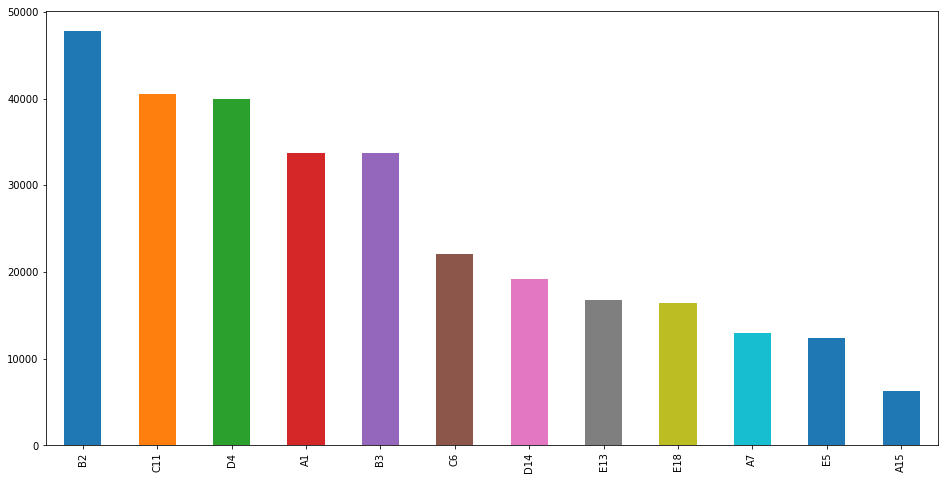

In [46]:
plt.figure(figsize=(16,8))
df['DISTRICT'].value_counts().plot.bar()
plt.show()

Then i visualized district for each years. And i concluded, that there are not significant changes. For example, there are bar charts for 2015 (1st plot) and 2018 (2nd plot):


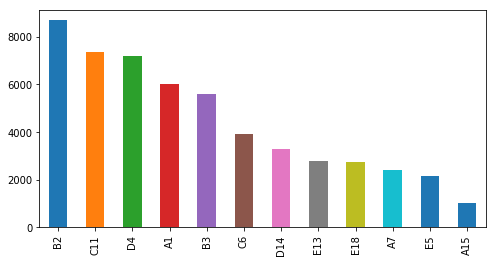

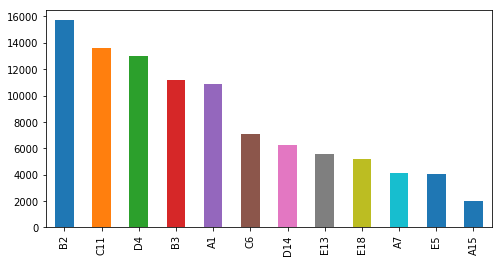

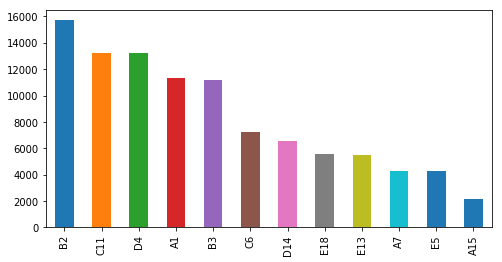

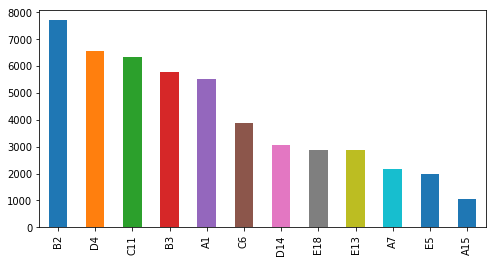

In [47]:
# 2015
plt.figure(figsize=(8,4))
df['DISTRICT'].loc[df['YEAR']==2015].value_counts().plot.bar()
plt.show()

# 2016
plt.figure(figsize=(8,4))
df['DISTRICT'].loc[df['YEAR']==2016].value_counts().plot.bar()
plt.show()

# 2017
plt.figure(figsize=(8,4))
df['DISTRICT'].loc[df['YEAR']==2017].value_counts().plot.bar()
plt.show()

# 2018
plt.figure(figsize=(8,4))
df['DISTRICT'].loc[df['YEAR']==2018].value_counts().plot.bar()
plt.show()

In [48]:
i = 1

while i < 13:
    print('== ' + str(i) + ' ==')
    print(df['DISTRICT'].loc[df['MONTH']==i].value_counts())
    i +=1

== 1 ==
B2     3793
C11    3219
D4     2922
B3     2668
A1     2550
C6     1743
D14    1432
E18    1331
E13    1299
A7     1036
E5     1008
A15     478
Name: DISTRICT, dtype: int64
== 2 ==
B2     3310
C11    2913
D4     2873
B3     2364
A1     2321
C6     1559
D14    1396
E18    1275
E13    1240
A7      950
E5      910
A15     438
Name: DISTRICT, dtype: int64
== 3 ==
B2     3987
C11    3170
D4     3126
B3     2671
A1     2581
C6     1893
D14    1458
E13    1302
E18    1297
E5     1019
A7      986
A15     504
Name: DISTRICT, dtype: int64
== 4 ==
B2     3895
C11    3194
D4     3119
B3     2722
A1     2572
C6     1835
D14    1402
E13    1357
E18    1298
A7     1082
E5      996
A15     472
Name: DISTRICT, dtype: int64
== 5 ==
B2     4046
C11    3573
D4     3396
B3     2987
A1     2881
C6     1801
D14    1732
E18    1451
E13    1446
A7     1102
E5     1049
A15     563
Name: DISTRICT, dtype: int64
== 6 ==
B2     4762
D4     4050
C11    3943
B3     3387
A1     3222
C6     2224
D14    1904
E18

### 5.2. Total number crime for each year

In [49]:
list_unique_year, list_number_year = create_list_number_crime('YEAR',df['YEAR'].unique())

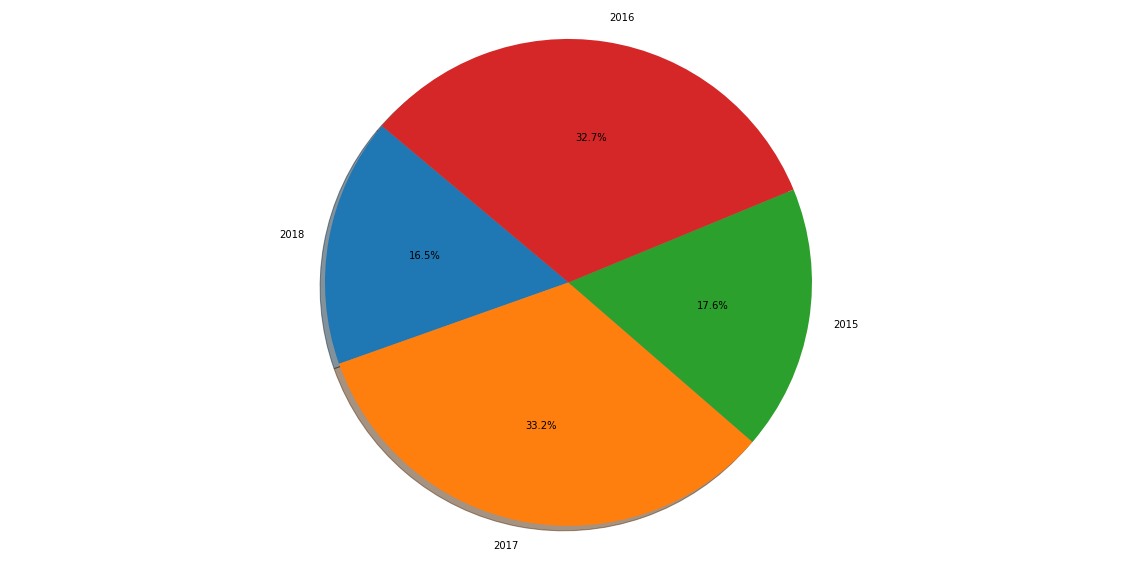

0

In [50]:
pie_plot(list_unique_year, list_number_year)

We have question - ‘How has crime changed over the years?’. We need to visualization data for conclusion. 

There is bar chart for value_counts each years:

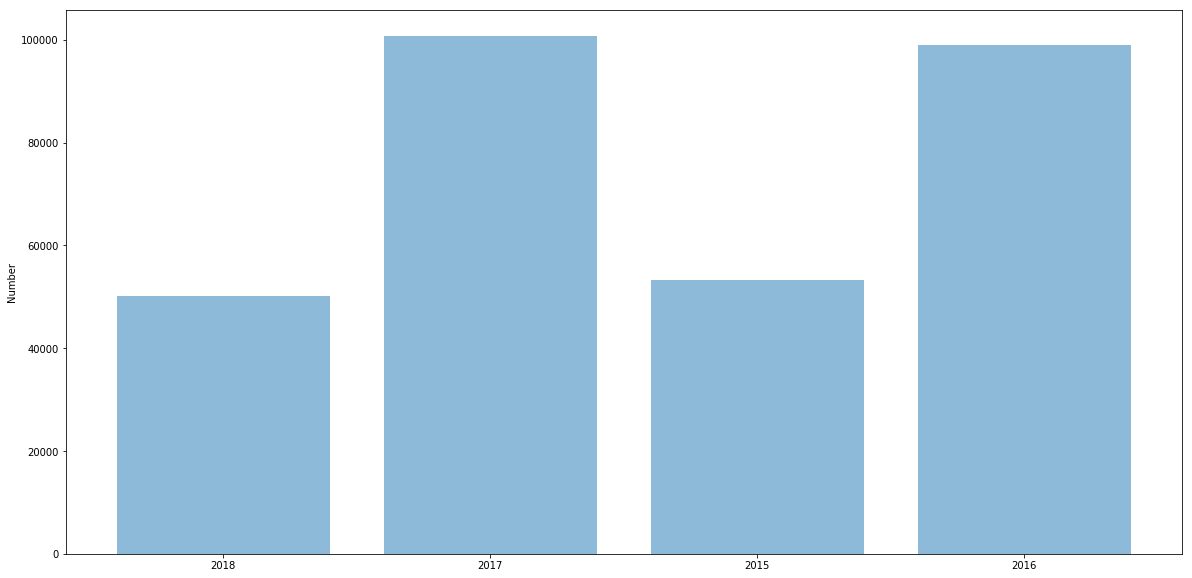

0

In [51]:
bar_chart(list_number_year,list_unique_year)

Each years have different number of crime. But our dataframe don't contain information for each month in 2015 and 2018.  The database has boundaries in time:

**first**     2015-06-15

**last**      2018-07-10

So, plot don't show big change. But we can calculate it. I compared 2015 & 2018, 2016 & 2017.

On my opinion, it is little changes, but we cannot conclude, because there are not enough data. In perspective, we can use dataframe with more information. 

### 5.3.  Total number crime for each month

In [52]:
list_unique_month, list_number_month = create_list_number_crime('MONTH',list(range(1,13)))

In [53]:
# pie_plot(list_unique_month,list_number_month)

I visualized value_count for each months too. This bar chart show interesting dynamic. 

- From February to June - increase in the number of crimes

- From June to January - reducing the number of crimes


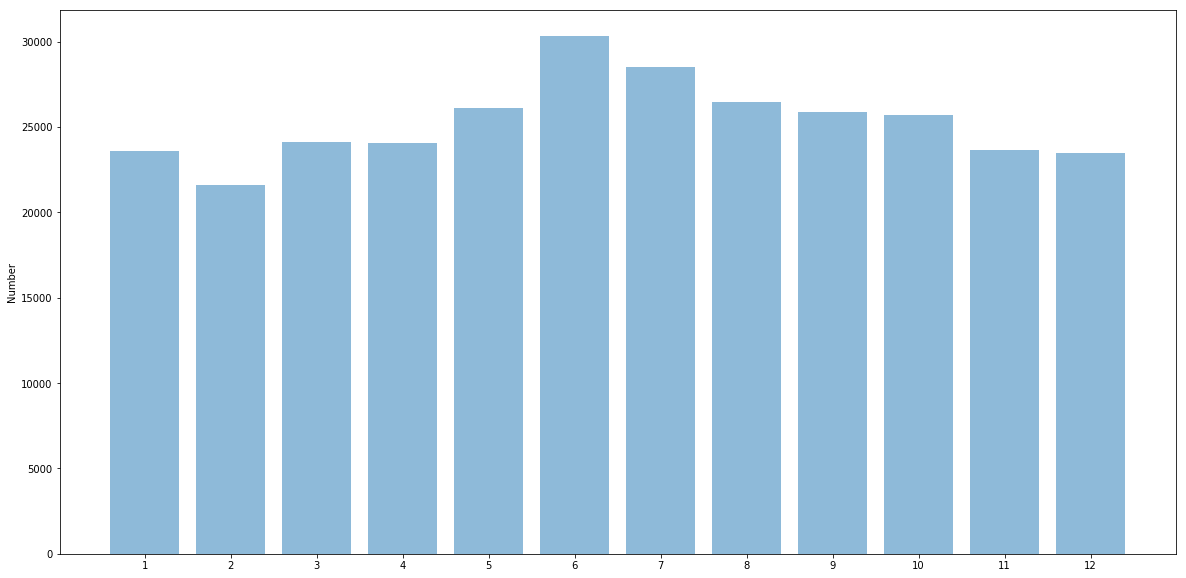

0

In [54]:
bar_chart(list_number_month,list_unique_month)

### 5.4. Total number crime for each day of week

Bar chart for ‘Day_of_week’	don't show interesting dynamic.

- From Monday to Friday - little increase in the number of crimes
- From Friday to Sunday - reducing the number of crimes


In [55]:
day_of_week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

In [56]:
list_unique_day, list_number_day = create_list_number_crime('DAY_OF_WEEK',day_of_week)

In [57]:
#pie_plot(list_unique_day,list_number_day)

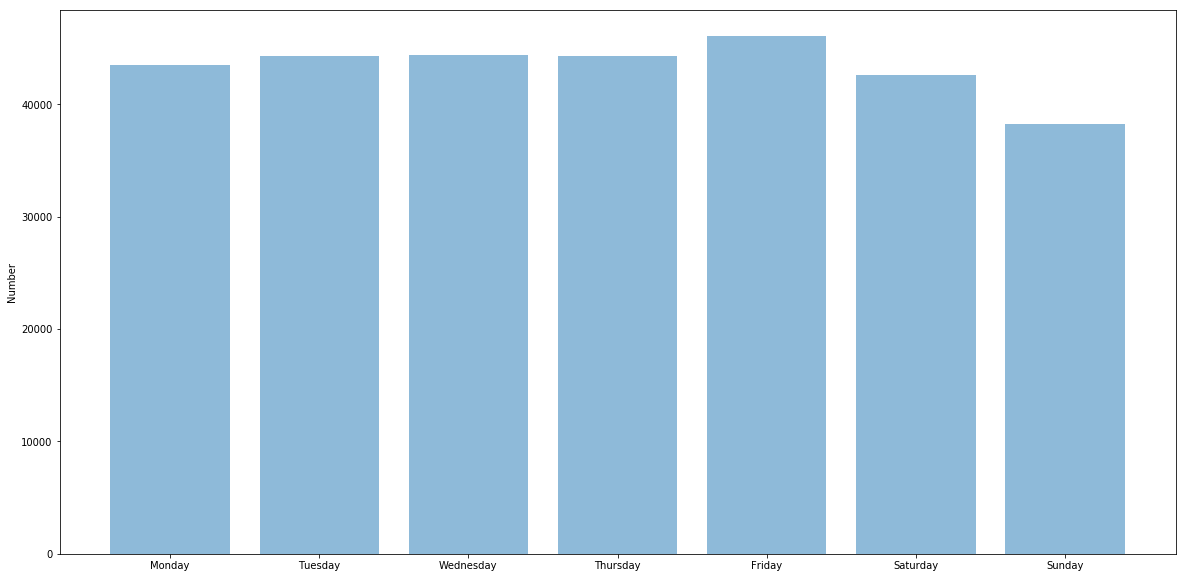

0

In [58]:
bar_chart(list_number_day,list_unique_day)

### 5.5. Total number crime for each hour

Bar chart for ‘hour’ show big dynamic. 

Crimes number:
- max: 5 pm
- min: 5 am
- Increase in the number of crimes: from 5 am to 5 pm
- Reduce the number of crimes: 17 - 23, -> 0 - 5

In [59]:
list_unique_hour, list_number_hour = create_list_number_crime('HOUR',list(range(0,24)))

In [60]:
# pie_plot(list_unique_hour, list_number_hour)

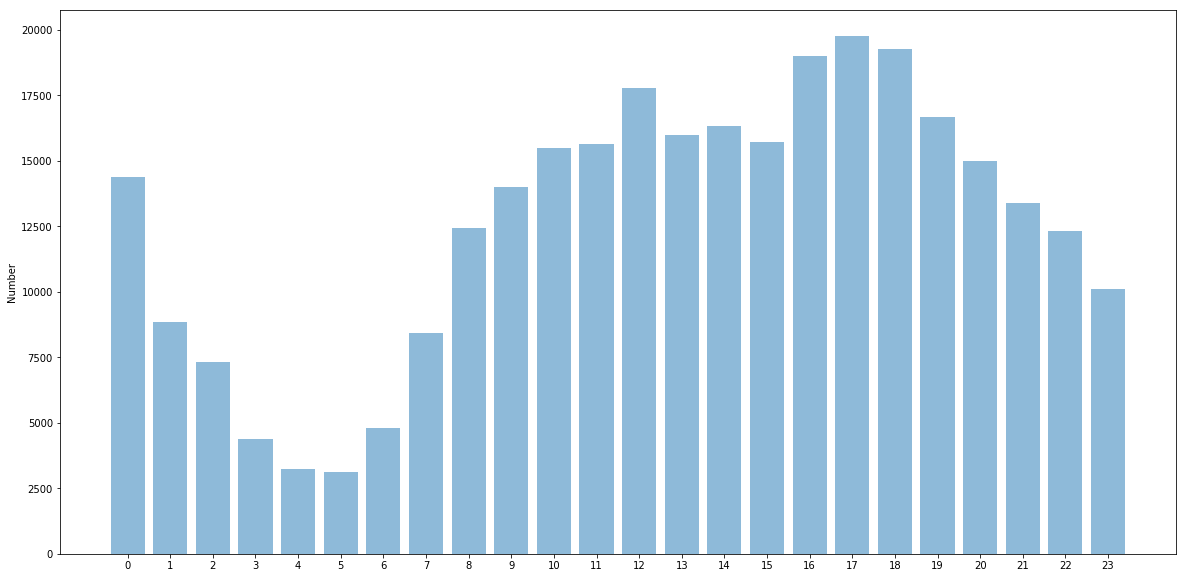

0

In [61]:
bar_chart(list_number_hour,list_unique_hour)

### 5.6. SHOOTING

Number is more useful than bar chart.

- With shooting(num): 969
- With shooting(%):   0.32%
- Without shooting(num): 302 402
- Without shooting(%):   99.68%

After that i build bar chart only for crimes with shooting. On my opinion, these crimes are specifications. There are:

- Shooting for each month
- Shooting for each day of week
- Shooting for each hour
- Shooting and district
- Shooting and location

In [ ]:
df['SHOOTING'].fillna(0, inplace = True)

df['SHOOTING'] = df['SHOOTING'].map({
    0: 0,
    'Y':1
})

In [63]:
shoot_true = len(df.loc[df['SHOOTING'] == 1])
shoot_false = len(df.loc[df['SHOOTING'] == 0])

In [64]:
print('With shooting(num): ' + str(shoot_true))
print('With shooting(%):   ' + str(round(shoot_true*100/len(df),2))+'%')
print()
print('Without shooting(num): ' + str(shoot_false))
print('Without shooting(%):   ' + str(round(shoot_false*100/len(df),2))+'%')

With shooting(num): 969
With shooting(%):   0.32%

Without shooting(num): 302402
Without shooting(%):   99.68%


In [65]:
df_shoot = df.loc[df['SHOOTING'] == 1]
df_shoot.shape

(969, 16)

#### 5.6.1. Shooting & year

In [66]:
shoot_y_2015 = len(df_shoot.loc[df_shoot['YEAR'] == 2015])
shoot_y_2016 = len(df_shoot.loc[df_shoot['YEAR'] == 2016])
shoot_y_2017 = len(df_shoot.loc[df_shoot['YEAR'] == 2017])
shoot_y_2018 = len(df_shoot.loc[df_shoot['YEAR'] == 2018])

unique_shoot_year = '2015', '2016', '2017', '2018'
number_shoot_year = [shoot_y_2015, shoot_y_2016, shoot_y_2017, shoot_y_2018]

In [67]:
# pie_plot(unique_shoot_year,number_shoot_year)

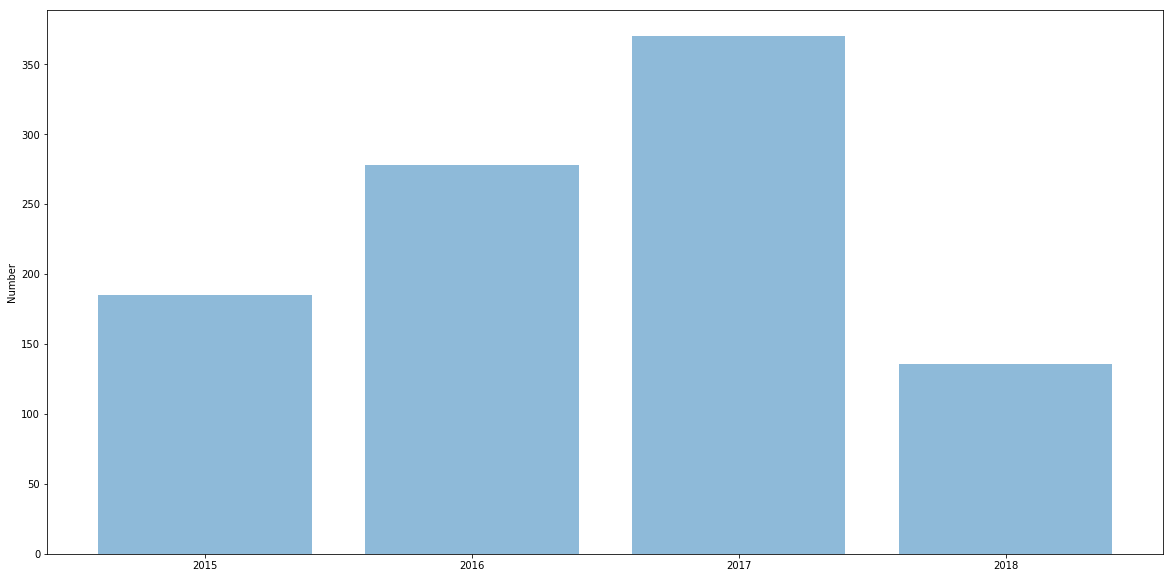

0

In [68]:
bar_chart(number_shoot_year,unique_shoot_year)

#### 5.6.2. Shooting & month

	Different number of crimes for each month. It is interesting result. See lower...


In [69]:
i = 1
list_month = list()

while i <= 12:
    list_month.append(len(df_shoot.loc[df_shoot['MONTH'] == i]))
    i+=1

In [70]:
# pie_plot(list(range(1,13)), list_month)

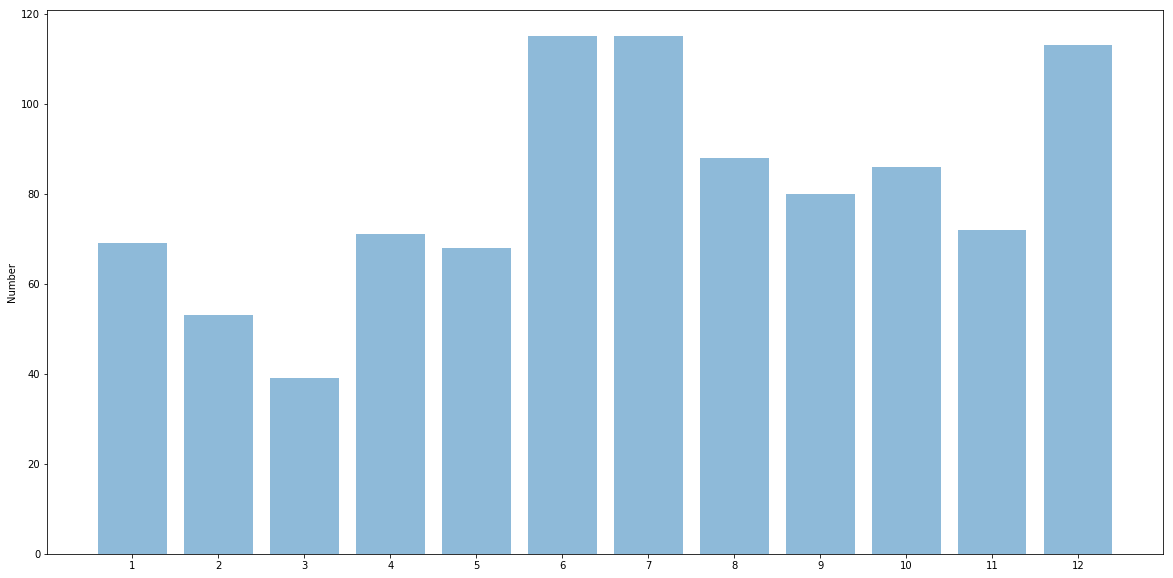

0

In [71]:
bar_chart(list_month,list(range(1,13)))

#### 5.6.3. Shooting & day of week

Bar chart for crimes with shooting is more dynamic than plot for total number of crimes. See lower:

From monday to friday - little increase in the number of crimes
Saturday has a big jump in the number of crimes with shooting. It is interesting result and it need to deep research.

In [72]:
day_of_week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

i = 0
day_number = list()

while i < 7:
    day_number.append(len(df_shoot.loc[df_shoot['DAY_OF_WEEK'] == day_of_week[i]]))
    
    i +=1

In [73]:
# pie_plot(day_of_week, day_number)

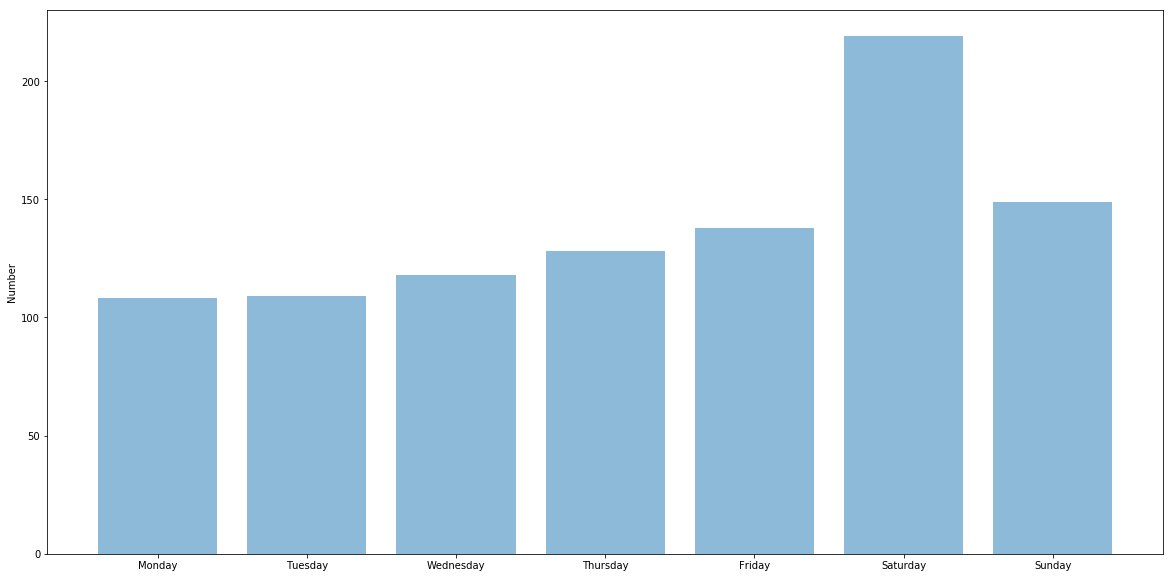

0

In [74]:
bar_chart(day_number,day_of_week)

#### 5.6.4. Shooting & hour

	Bar chart for crimes with shooting and total number of crime are similar, but this bar chart have more different chart than other.

In [75]:
i = 0
hour_number = list()

while i < 24:
    hour_number.append(len(df_shoot.loc[df_shoot['HOUR'] == i]))
    i +=1

In [76]:
# pie_plot(list(range(0,24)), hour_number)

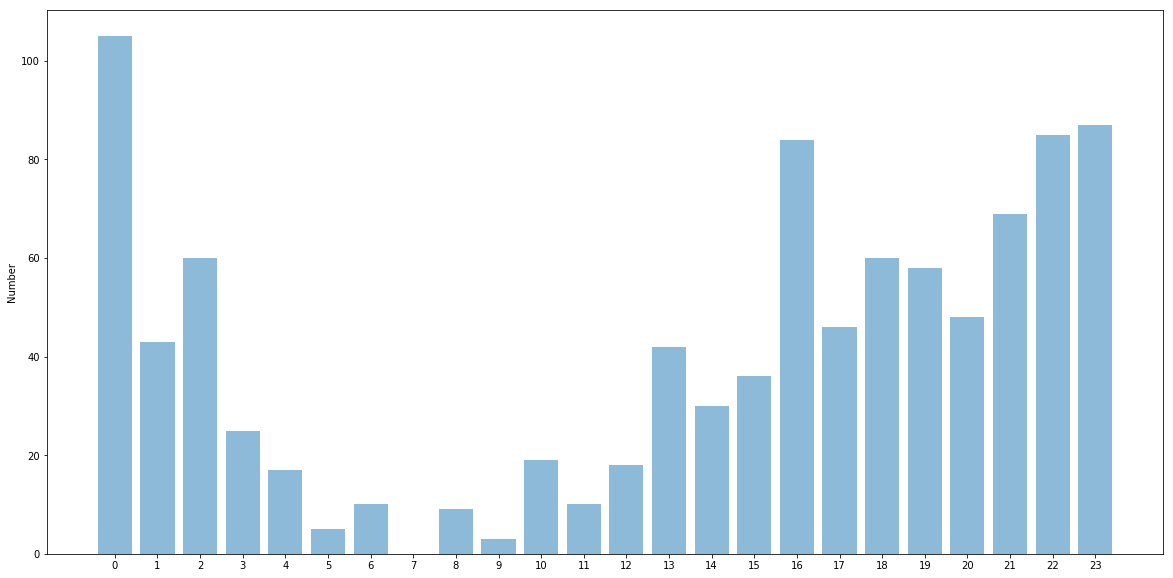

0

In [77]:
bar_chart(hour_number,list(range(0,24)))

#### 5.6.5. Shooting & District

So, B2 district is leader for crimes with shooting too. 

B3 district is on 5st position in total top, but it is on 2nd position in top with shooting.

Top districts with shooting:

1. B2
2. B3
3. C11

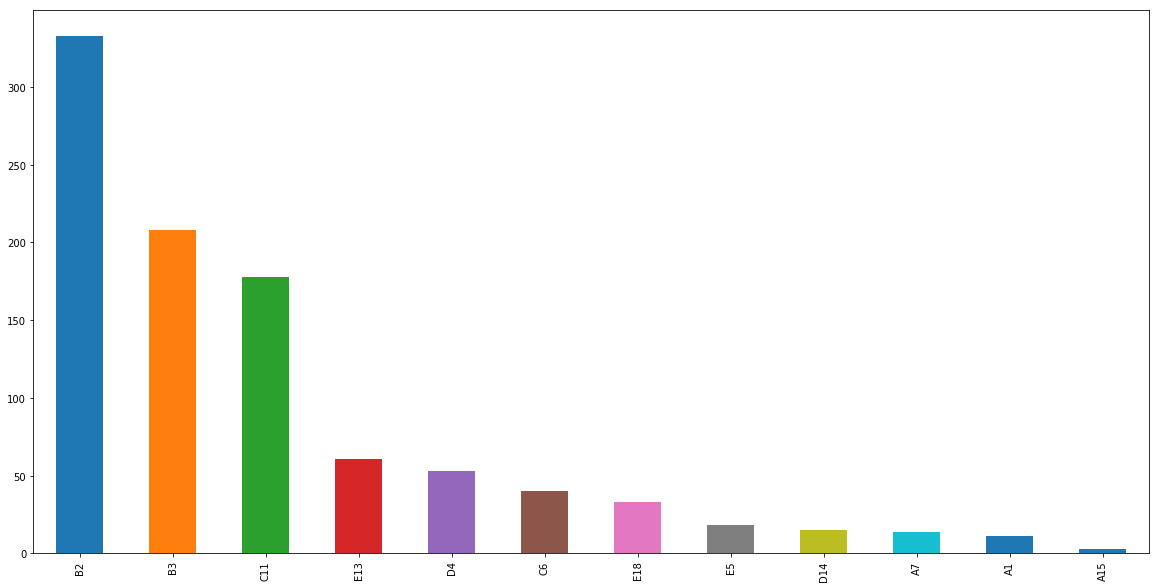

In [78]:
plt.figure(figsize=(20,10))
df_shoot['DISTRICT'].value_counts().plot.bar()
plt.show()

#### 5.6.6. Shooting and location

	I built scatter plot for location (long,lat), where was crimes with shooting. And we get next results:

/home/olexandr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/olexandr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/olexandr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/olexandr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


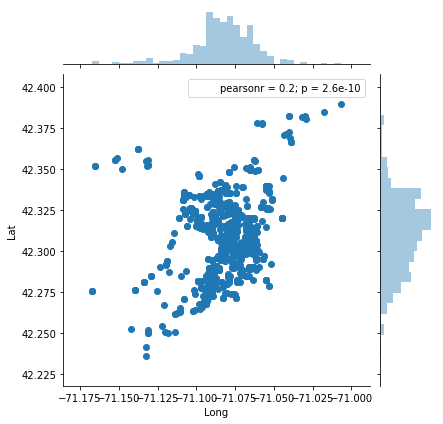

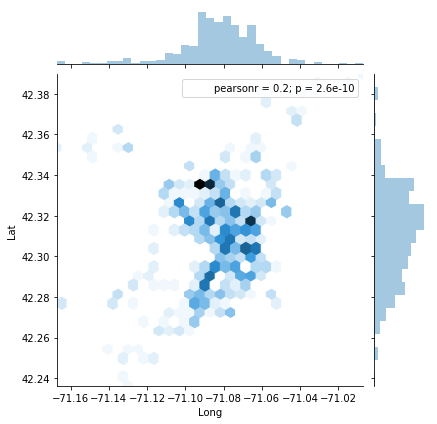

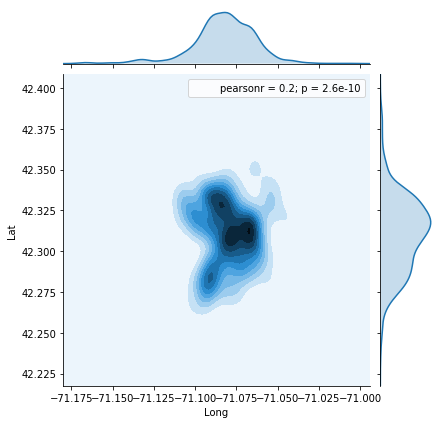

In [79]:
location_shoot = df_shoot[['Lat','Long']]
location_shoot = location_shoot.dropna()

location_shoot = location_shoot.loc[(location_shoot['Lat']>40) & (location_shoot['Long'] < -60)]  

x_shoot = location_shoot['Long']
y_shoot = location_shoot['Lat']

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x_shoot, y_shoot, kind='scatter')
sns.jointplot(x_shoot, y_shoot, kind='hex')
sns.jointplot(x_shoot, y_shoot, kind='kde')

#### 5.7. UCR_PART

UCR - Uniform Crime Reports

https://en.wikipedia.org/wiki/Uniform_Crime_Reports 
    
There is bar chart for each UCR part. 3st part is leader


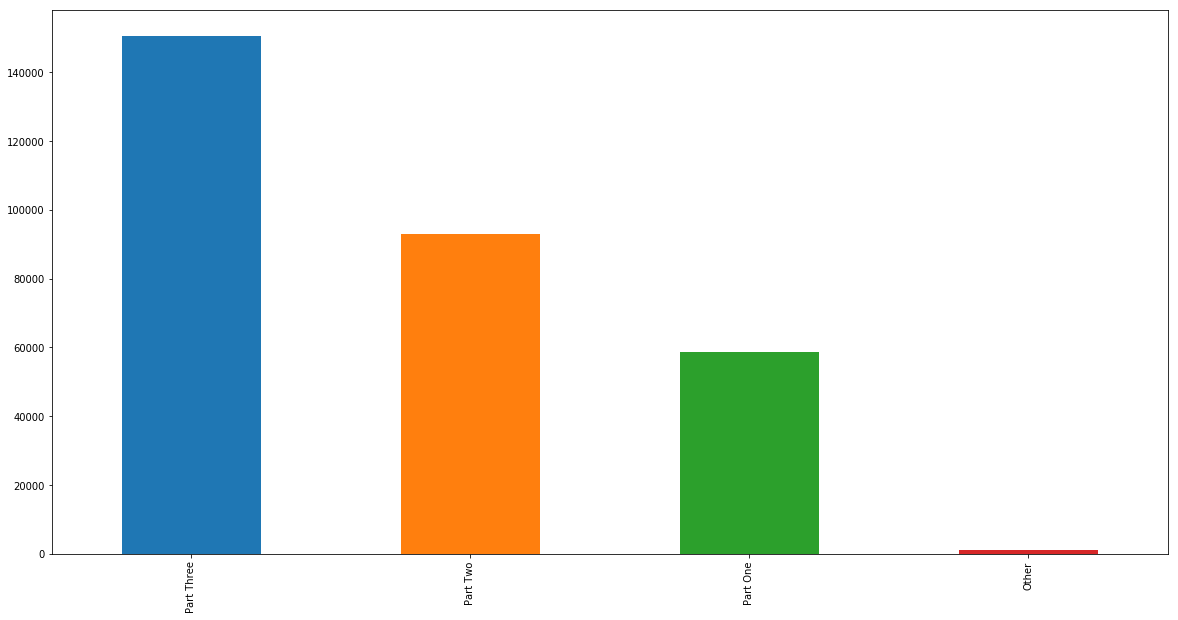

In [80]:
plt.figure(figsize=(20,10))
df['UCR_PART'].value_counts().plot.bar()
plt.show()


#### 5.8. Lat, Long

In [81]:
df[['Lat','Long']].describe()

Lat           Long
count  284532.000000  284532.000000
mean       42.221680     -70.920017
std         2.085899       3.374111
min        -1.000000     -71.178674
25%        42.297521     -71.097131
50%        42.325538     -71.077497
75%        42.348624     -71.062492
max        42.395042      -1.000000

In [82]:
location = df[['Lat','Long']]
location = location.dropna()

location = location.loc[(location['Lat']>40) & (location['Long'] < -60)]  

Then i use simple scatter plot, because scatter plot is more useful than basemap.

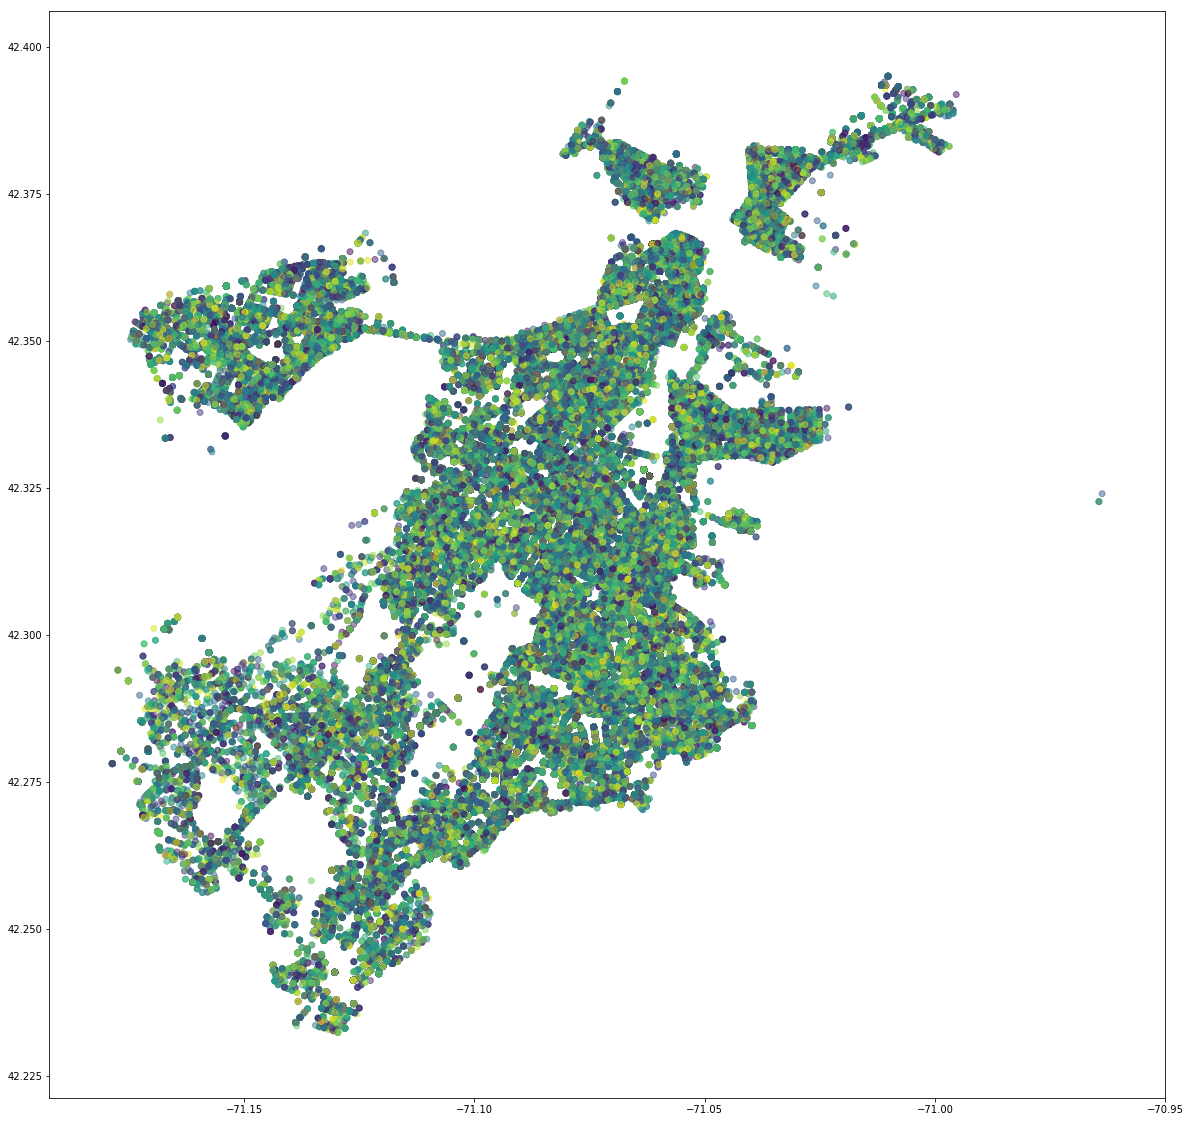

In [83]:
x = location['Long']
y = location['Lat']


colors = np.random.rand(len(x))

plt.figure(figsize=(20,20))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

In [84]:
m = folium.Map([42.348624, -71.062492], zoom_start=11)
m

After that i built hot map for location. I think, It is the most useful.

/home/olexandr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/olexandr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/olexandr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/olexandr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


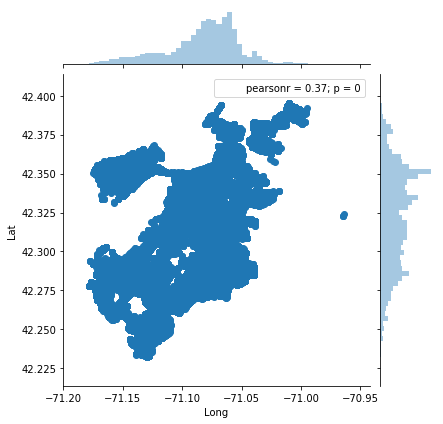

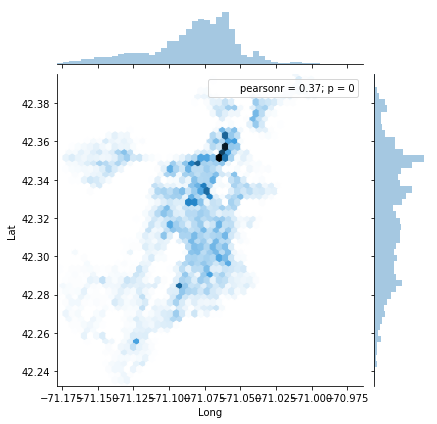

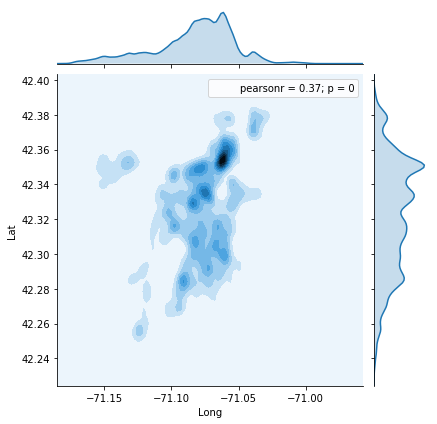

In [85]:
x = location['Long']
y = location['Lat']


# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x, y, kind='scatter')
sns.jointplot(x, y, kind='hex')
sns.jointplot(x, y, kind='kde')

In [86]:
#plt.figure(figsize=(20,20))

#map = Basemap(
#    projection='merc', 
#    lat_0 = 42.2, 
#    lon_0 = -70.9,
#    resolution = 'h', 
#    area_thresh = 0.1,
#    llcrnrlon=-70.8, 
#    llcrnrlat=42.2,
#    urcrnrlon=-71.5, 
#    urcrnrlat=42.5
#)
 
#map.drawcoastlines()
#map.drawcountries()
#map.fillcontinents(color = 'coral')
#map.drawmapboundary()

#lons = list(long[0:1000])
#lats = list(lat[0:1000])
#x,y = map(lons, lats)
#map.plot(x, y, 'bo', markersize=3)

#plt.show()

In [87]:
df.isnull().sum()

OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1643
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  90
STREET                 10618
Lat                    18839
Long                   18839
Location                   0
dtype: int64

# Create new var

#### Day or Night

###### Link

https://www.timeanddate.com/sun/usa/boston

In [88]:
df['Day'] = 0

In [89]:
df['Night'] = 0

In [90]:
# Day or night for 1st month
df['Day'].loc[(df['MONTH'] == 1) & (df['HOUR'] >= 6) & (df['HOUR'] <= 18)] = 1

# Day or night for 2st month
df['Day'].loc[(df['MONTH'] == 2) & (df['HOUR'] >= 6) & (df['HOUR'] <= 19)] = 1

# for 3st month
df['Day'].loc[(df['MONTH'] == 3) & (df['HOUR'] >= 6) & (df['HOUR'] <= 20)] = 1

# Day or night for 4st month
df['Day'].loc[(df['MONTH'] == 4) & (df['HOUR'] >= 5) & (df['HOUR'] <= 20)] = 1

# Day or night for 5st month
df['Day'].loc[(df['MONTH'] == 5) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1

# Day or night for 6st month
df['Day'].loc[(df['MONTH'] == 6) & (df['HOUR'] >= 4) & (df['HOUR'] <= 21)] = 1

# Day or night for 7st month
df['Day'].loc[(df['MONTH'] == 7) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1

# Day or night for 8st month
df['Day'].loc[(df['MONTH'] == 8) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1

# Day or night for 9st month
df['Day'].loc[(df['MONTH'] == 9) & (df['HOUR'] >= 6) & (df['HOUR'] <= 20)] = 1

# Day or night for 10st month
df['Day'].loc[(df['MONTH'] == 10) & (df['HOUR'] >= 6) & (df['HOUR'] <= 19)] = 1

# Day or night for 11st month
df['Day'].loc[(df['MONTH'] == 11) & (df['HOUR'] >= 6) & (df['HOUR'] <= 17)] = 1

# Day or night for 12st month
df['Day'].loc[(df['MONTH'] == 12) & (df['HOUR'] >= 7) & (df['HOUR'] <= 17)] = 1

/home/olexandr/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [91]:
df['Night'].loc[df['Day']==0]=1

/home/olexandr/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


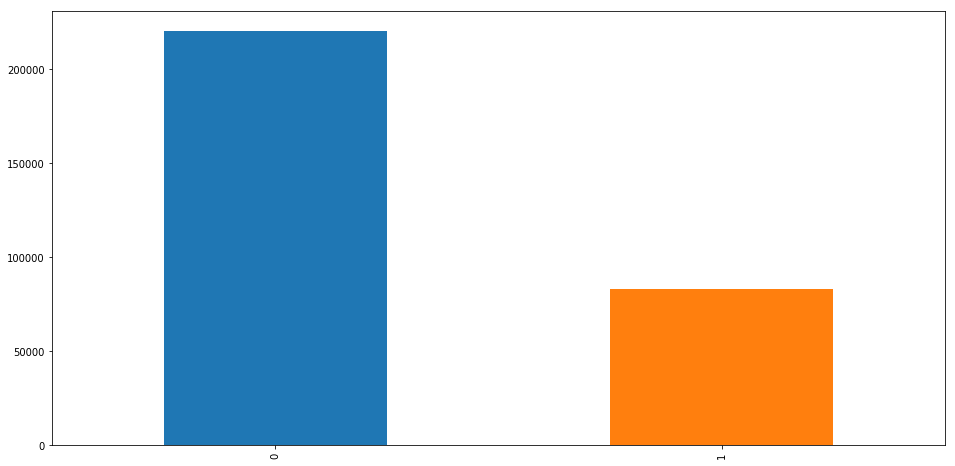

In [92]:
plt.figure(figsize=(16,8))
df['Night'].value_counts().plot.bar()
plt.show()

# 6. Modeling

### 6.1. Multi classification
Y - OFFENSE_CODE_GROUP

X - 'DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK',
               'HOUR','Lat','Long', 'OFFENSE_CODE_GROUP','Day','Night'

I fitted different models for multi classification. 

‘OFFENSE_CODE_GROUP’ is output category.
    
**Why?**

I think, predicting for offense code group is useful. 

**How?**

We can use information about location and time for offense. Input variable you can see lower.


In [93]:
df['OFFENSE_CODE_GROUP'].value_counts().head(15)

Motor Vehicle Accident Response    35342
Larceny                            24534
Medical Assistance                 22351
Investigate Person                 17867
Other                              17223
Drug Violation                     15844
Simple Assault                     15025
Vandalism                          14741
Verbal Disputes                    12370
Towed                              10656
Investigate Property               10562
Larceny From Motor Vehicle         10276
Property Lost                       9156
Warrant Arrests                     7970
Aggravated Assault                  7402
Name: OFFENSE_CODE_GROUP, dtype: int64

In [94]:
list_offense_code_group = ('Motor Vehicle Accident Response',
                           'Larceny',
                           'Medical Assistance',
                           'Investigate Person',
                           'Other',
                           'Drug Violation',
                           'Simple Assault',
                           'Vandalism',
                           'Verbal Disputes',
                           'Towed',
                           'Investigate Property',
                           'Larceny From Motor Vehicle')

In [95]:
df_model = pd.DataFrame()

In [96]:
i = 0

while i < len(list_offense_code_group):

    df_model = df_model.append(df.loc[df['OFFENSE_CODE_GROUP'] == list_offense_code_group[i]])
    
    i+=1

In [97]:
list_column = ['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK',
               'HOUR','Lat','Long', 'OFFENSE_CODE_GROUP','Day','Night']

In [98]:
df_model = df_model[list_column]

In [99]:
# DISTRICT

df_model['DISTRICT'] = df_model['DISTRICT'].map({
    'B3':1, 
    'E18':2, 
    'B2':3, 
    'E5':4, 
    'C6':5, 
    'D14':6, 
    'E13':7, 
    'C11':8, 
    'D4':9, 
    'A7':10, 
    'A1':11, 
    'A15':12
})

df_model['DISTRICT'].unique()

array([  3.,   7.,   1.,  nan,  11.,   5.,   8.,   4.,   6.,  12.,   9.,
         2.,  10.])

In [100]:
# REPORTING_AREA

df_model['REPORTING_AREA'] = pd.to_numeric(df_model['REPORTING_AREA'], errors='coerce')

In [101]:
# MONTH

df_model['MONTH'].unique()

array([ 7,  6,  5,  4,  8, 11,  3, 12,  1,  2,  9, 10])

In [102]:
# DAY_OF_WEEK

df_model['DAY_OF_WEEK'] = df_model['DAY_OF_WEEK'].map({
    'Tuesday':2, 
    'Saturday':6, 
    'Monday':1, 
    'Sunday':7, 
    'Thursday':4, 
    'Wednesday':3,
    'Friday':5
})

df_model['DAY_OF_WEEK'].unique()

array([2, 6, 7, 1, 4, 5, 3])

In [103]:
# HOUR

df_model['HOUR'].unique()

array([18, 12, 17, 16, 11, 19, 14, 20, 15, 13,  7, 10,  9,  8,  5,  1, 22,
       21,  0,  6,  4,  2, 23,  3])

In [104]:
# Lat, Long

df_model[['Lat', 'Long']].head()

Lat       Long
41  42.319408 -71.081405
43  42.322067 -71.112965
46  42.280292 -71.072206
56  -1.000000  -1.000000
57  42.287701 -71.106713

In [105]:
df_model.fillna(0, inplace = True)

In [106]:
x = df_model[['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK','HOUR','Lat','Long','Day','Night']]

In [107]:
y = df_model['OFFENSE_CODE_GROUP']

In [108]:
y.unique()

array(['Motor Vehicle Accident Response', 'Larceny', 'Medical Assistance',
       'Investigate Person', 'Other', 'Drug Violation', 'Simple Assault',
       'Vandalism', 'Verbal Disputes', 'Towed', 'Investigate Property',
       'Larceny From Motor Vehicle'], dtype=object)

In [109]:
y = y.map({
    'Motor Vehicle Accident Response':1, 
    'Larceny':2, 
    'Medical Assistance':3,
    'Investigate Person':4, 
    'Other':5, 
    'Drug Violation':6, 
    'Simple Assault':7,
    'Vandalism':8, 
    'Verbal Disputes':9, 
    'Towed':10, 
    'Investigate Property':11,
    'Larceny From Motor Vehicle':12
})

#### 6.1.2. Split data for *sklearn.multiclass*

In [110]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    x,
    y, 
    test_size = 0.1,
    random_state=42
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(186111, 9) (186111,)
(20680, 9) (20680,)


#### 6.1.3. Models

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelSpreading
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [112]:
from sklearn.metrics import f1_score

###### Top 3 models:

1.RandomForestClassifier

- mean: 0.2157
- max: 0.5009
- min: 0.0982


2.DecisionTreeClassifier

- mean: 0.2073
- max: 0.4727
- min: 0.1049


3.LGBMClassifier

- mean: 0.1909
- max: 0.3963
- min: 0.0262

In [113]:
def fun_results(result):
    print('mean: ' + str(result.mean()))
    print('max: ' + str(result.max()))
    print('min: ' + str(result.min()))
    return result

In [114]:
# DecisionTreeClassifier

def fun_DecisionTreeClassifier(X_train, Y_train):
    dec_tree = DecisionTreeClassifier()
    dec_tree = dec_tree.fit(X_train, Y_train)

    dec_tree_pred = dec_tree.predict(X_test)

    dec_tree_score = f1_score(Y_test, dec_tree_pred, average=None)
    return fun_results(dec_tree_score)

fun_DecisionTreeClassifier(X_train, Y_train)

mean: 0.207531812402
max: 0.469733656174
min: 0.105154639175


array([ 0.31571367,  0.32818074,  0.17393229,  0.14380531,  0.1447186 ,
        0.46973366,  0.10841253,  0.11054248,  0.14762887,  0.2679558 ,
        0.17460317,  0.10515464])

In [115]:
# BernoulliNB

def fun_BernoulliNB(X_train, Y_train):
    bernoulli = BernoulliNB()
    bernoulli = bernoulli.fit(X_train, Y_train)

    bernoulli_pred = bernoulli.predict(X_test)

    bernoulli_score = f1_score(Y_test, bernoulli_pred, average=None)
    return fun_results(bernoulli_score)

fun_BernoulliNB(X_train, Y_train)

mean: 0.0489832832781
max: 0.281337047354
min: 0.0


/home/olexandr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.28133705,  0.23205626,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.0744061 ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [116]:
# ExtraTreeClassifier

def fun_ExtraTreeClassifier(X_train, Y_train):
    ext_tree = ExtraTreeClassifier()
    ext_tree = ext_tree.fit(X_train, Y_train)

    ext_tree_pred = ext_tree.predict(X_test)

    ext_tree_score = f1_score(Y_test, ext_tree_pred, average=None)
    return fun_results(ext_tree_score)

fun_ExtraTreeClassifier(X_train, Y_train)

mean: 0.189333380965
max: 0.460384153661
min: 0.0881944444444


array([ 0.28752521,  0.29671841,  0.16316271,  0.12111203,  0.13562137,
        0.46038415,  0.10258176,  0.08819444,  0.13233458,  0.22822543,
        0.15007215,  0.10606833])

In [117]:
# KNeighborsClassifier

def fun_KNeighborsClassifier(X_train, Y_train):
    neigh = KNeighborsClassifier()
    neigh.fit(X_train, Y_train) 

    neigh_pred = neigh.predict(X_test)

    neigh_score = f1_score(Y_test, neigh_pred, average=None)
    return fun_results(neigh_score)

fun_KNeighborsClassifier(X_train, Y_train)

mean: 0.174913592755
max: 0.357229647631
min: 0.0662824207493


array([ 0.31750713,  0.30551391,  0.16411621,  0.11107625,  0.11620795,
        0.35722965,  0.10544815,  0.07713249,  0.10837438,  0.24134199,
        0.12873258,  0.06628242])

In [118]:
# GaussianNB

def fun_GaussianNB(X_train, Y_train):
    gauss = GaussianNB()
    gauss = gauss.fit(X_train, Y_train)

    gauss_pred = gauss.predict(X_test)

    gauss_score = f1_score(Y_test, gauss_pred, average=None)
    return fun_results(gauss_score)

fun_GaussianNB(X_train, Y_train)

mean: 0.0636003414814
max: 0.265821531148
min: 0.0


/home/olexandr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.24434208,  0.26582153,  0.00363141,  0.        ,  0.        ,
        0.        ,  0.        ,  0.09281228,  0.15659679,  0.        ,
        0.        ,  0.        ])

In [119]:
# RandomForestClassifier

def fun_RandomForestClassifier(X_train, Y_train):
    rfc = RandomForestClassifier()
    rfc = rfc.fit(X_train, Y_train)

    rfc_pred = rfc.predict(X_test)

    rfc_score = f1_score(Y_test, rfc_pred, average=None)
    return fun_results(rfc_score)

fun_RandomForestClassifier(X_train, Y_train)

mean: 0.224051191718
max: 0.515037593985
min: 0.102564102564


array([ 0.33791241,  0.36782902,  0.20190476,  0.1374269 ,  0.13967489,
        0.51503759,  0.13401311,  0.1025641 ,  0.14465409,  0.30738119,
        0.18964514,  0.11057108])

In [120]:
# LGBMClassifier

def fun_LGBMClassifier(X_train, Y_train):
    clf = LGBMClassifier()
    clf.fit(X_train, Y_train)

    clf_pred = clf.predict(X_test)

    clf_score = f1_score(Y_test, clf_pred, average=None)
    return fun_results(clf_score)

fun_LGBMClassifier(X_train, Y_train)

mean: 0.190916981866
max: 0.396344559147
min: 0.0262467191601


array([ 0.35276532,  0.39634456,  0.15846275,  0.09265734,  0.07865707,
        0.34907873,  0.10939989,  0.02624672,  0.15759687,  0.33946252,
        0.14750198,  0.08283003])

## 6.2. Multi classification
Y - DISTRICT

X - OFFENSE_CODE_GROUP, Month, Day of week, Hour, Day, Night


###### Top 3 models

1.RandomForestClassifier
- mean: 0.1165
- max: 0.2104
- min: 0.0304

2.DecisionTreeClassifier
- mean: 0.1146
- max: 0.2194
- min: 0.0227

3.ExtraTreeClassifier
- mean: 0.1141
- max: 0.2189
- min: 0.0233


In [121]:
df_model_2 = df[['OFFENSE_CODE', 'DISTRICT','MONTH','DAY_OF_WEEK','HOUR','Day','Night']]

In [122]:
df_model_2['OFFENSE_CODE'] = pd.to_numeric(df_model_2['OFFENSE_CODE'], errors='coerce')

/home/olexandr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [123]:
# DISTRICT

df_model_2['DISTRICT'] = df_model_2['DISTRICT'].map({
    'B3':1, 
    'E18':2, 
    'B2':3, 
    'E5':4, 
    'C6':5, 
    'D14':6, 
    'E13':7, 
    'C11':8, 
    'D4':9, 
    'A7':10, 
    'A1':11, 
    'A15':12
})

df_model_2['DISTRICT'].unique()

/home/olexandr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  nan,
        11.,  12.])

In [124]:
# DAY_OF_WEEK

df_model_2['DAY_OF_WEEK'] = df_model_2['DAY_OF_WEEK'].map({
    'Tuesday':2, 
    'Saturday':6, 
    'Monday':1, 
    'Sunday':7, 
    'Thursday':4, 
    'Wednesday':3,
    'Friday':5
})

df_model_2['DAY_OF_WEEK'].unique()

/home/olexandr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


array([2, 6, 1, 7, 4, 3, 5])

In [125]:
df_model_2.isnull().sum()

OFFENSE_CODE       0
DISTRICT        1643
MONTH              0
DAY_OF_WEEK        0
HOUR               0
Day                0
Night              0
dtype: int64

In [126]:
df_model_2 = df_model_2.dropna()

In [127]:
df_model_2['DISTRICT'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

In [128]:
df_model_2.shape

(301728, 7)

In [129]:
x = df_model_2[['OFFENSE_CODE','MONTH','DAY_OF_WEEK','HOUR','Day','Night']]
y = df_model_2['DISTRICT']

In [130]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    x,
    y, 
    test_size = 0.1,
    random_state=42
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(271555, 6) (271555,)
(30173, 6) (30173,)


In [131]:
fun_DecisionTreeClassifier(X_train, Y_train)


mean: 0.113852306948
max: 0.219153988216
min: 0.0223602484472


array([ 0.17386514,  0.08114822,  0.21915399,  0.06125971,  0.10111317,
        0.09127907,  0.06345811,  0.15214313,  0.19416678,  0.04673394,
        0.15954618,  0.02236025])

In [132]:
fun_BernoulliNB(X_train, Y_train)

mean: 0.0288648861973
max: 0.275923612351
min: 0.0


/home/olexandr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.        ,  0.        ,  0.27592361,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.07045502,  0.        ])

In [133]:
fun_ExtraTreeClassifier(X_train, Y_train)

mean: 0.114376431817
max: 0.220643690257
min: 0.0262812089356


array([ 0.17625781,  0.08498896,  0.22064369,  0.06244579,  0.10377577,
        0.08764706,  0.06453926,  0.15406379,  0.19186681,  0.04264392,
        0.1573631 ,  0.02628121])

In [134]:
fun_KNeighborsClassifier(X_train, Y_train)

mean: 0.113087034442
max: 0.22231871472
min: 0.014409221902


array([ 0.18938526,  0.08774262,  0.22231871,  0.05066922,  0.09668295,
        0.08228268,  0.05468103,  0.14439856,  0.19235478,  0.03372093,
        0.18839844,  0.01440922])

In [135]:
fun_GaussianNB(X_train, Y_train)

mean: 0.0562521804862
max: 0.261955008756
min: 0.0


/home/olexandr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.        ,  0.        ,  0.26195501,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.23714051,  0.        ,
        0.17593065,  0.        ])

In [136]:
fun_RandomForestClassifier(X_train, Y_train)

mean: 0.116360924738
max: 0.210898661568
min: 0.0288659793814


array([ 0.15674518,  0.06987788,  0.21089866,  0.06567701,  0.09257934,
        0.08385269,  0.07886017,  0.16687913,  0.19692382,  0.0602357 ,
        0.18493552,  0.02886598])

In [137]:
fun_LGBMClassifier(X_train, Y_train)

mean: 0.106167401134
max: 0.284375164569
min: 0.0


array([ 0.15496845,  0.00361664,  0.28437516,  0.02929838,  0.0423588 ,
        0.04852014,  0.00954085,  0.16536228,  0.27056979,  0.00150943,
        0.26388889,  0.        ])

### 6.3. Multi classification - > UCR_PART

Y - UCR_PART

X - DISTRICT, REPORTING_AREA, MONTH, DAY_OF_WEEK, HOUR, LATITUDE, LONGITUDE

###### Top 3 models:

1.RandomForestClassifier
- mean: 0.4338
- max: 0.5917
- min: 0.3012

2.DecisionTreeClassifier
- mean: 0.4184
- max: 0.54007
- min: 0.2994

3.ExtraTreeClassifier
- mean: 0.4083
- max: 0.5379
- min: 0.2834


In [138]:
df_model3 = df[['DISTRICT','REPORTING_AREA', 'MONTH','DAY_OF_WEEK','HOUR','UCR_PART','Lat','Long']]

In [139]:
df_model3['DISTRICT'] = df_model3['DISTRICT'].map({
    'B3':1, 
    'E18':2, 
    'B2':3, 
    'E5':4, 
    'C6':5, 
    'D14':6, 
    'E13':7, 
    'C11':8, 
    'D4':9, 
    'A7':10, 
    'A1':11, 
    'A15':12
})

/home/olexandr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [140]:
# REPORTING_AREA

df_model3['REPORTING_AREA'] = pd.to_numeric(df_model3['REPORTING_AREA'], errors='coerce')

/home/olexandr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [141]:
# DAY_OF_WEEK

df_model3['DAY_OF_WEEK'] = df_model3['DAY_OF_WEEK'].map({
    'Tuesday':2, 
    'Saturday':6, 
    'Monday':1, 
    'Sunday':7, 
    'Thursday':4, 
    'Wednesday':3,
    'Friday':5
})

/home/olexandr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [142]:
df_model3['UCR_PART'].unique()

array(['Part Three', 'Part One', 'Part Two', 'Other', nan], dtype=object)

In [143]:
df_model3['UCR_PART'] = df_model3['UCR_PART'].map({
    'Part Three':3, 
    'Part One':1, 
    'Part Two':2, 
#    'Other':4
})

/home/olexandr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [144]:
df_model3 = df_model3.dropna()
print(df_model3.shape)
df_model3.isnull().sum()

(280737, 8)


DISTRICT          0
REPORTING_AREA    0
MONTH             0
DAY_OF_WEEK       0
HOUR              0
UCR_PART          0
Lat               0
Long              0
dtype: int64

In [145]:
x = df_model3[['DISTRICT','REPORTING_AREA', 'MONTH','DAY_OF_WEEK','HOUR','Lat','Long']]
y = df_model3['UCR_PART']

In [146]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    x,
    y, 
    test_size = 0.1,
    random_state=42
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(252663, 7) (252663,)
(28074, 7) (28074,)


In [147]:
fun_DecisionTreeClassifier(X_train, Y_train)

mean: 0.418043326873
max: 0.541077569736
min: 0.298726490681


array([ 0.29872649,  0.41432592,  0.54107757])

In [148]:
fun_BernoulliNB(X_train, Y_train)

mean: 0.218814203329
max: 0.656215595232
min: 0.0


/home/olexandr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([  0.00000000e+00,   2.27014756e-04,   6.56215595e-01])

In [149]:
fun_ExtraTreeClassifier(X_train, Y_train)

mean: 0.406566947281
max: 0.53752221088
min: 0.277425979805


array([ 0.27742598,  0.40475265,  0.53752221])

In [150]:
fun_KNeighborsClassifier(X_train, Y_train)

mean: 0.408040260817
max: 0.538271057397
min: 0.295997191011


array([ 0.29599719,  0.38985253,  0.53827106])

In [151]:
fun_GaussianNB(X_train, Y_train)

mean: 0.218814203329
max: 0.656215595232
min: 0.0


/home/olexandr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([  0.00000000e+00,   2.27014756e-04,   6.56215595e-01])

In [152]:
fun_RandomForestClassifier(X_train, Y_train)

mean: 0.433990334806
max: 0.592577248403
min: 0.300020028039


array([ 0.30002003,  0.40937373,  0.59257725])

In [153]:
fun_LGBMClassifier(X_train, Y_train)

mean: 0.331163035145
max: 0.662161470332
min: 0.159501746924


array([ 0.15950175,  0.17182589,  0.66216147])

## 6.4. Clustering location

In [154]:
location.isnull().sum()

Lat     0
Long    0
dtype: int64

In [155]:
location.shape

(283871, 2)

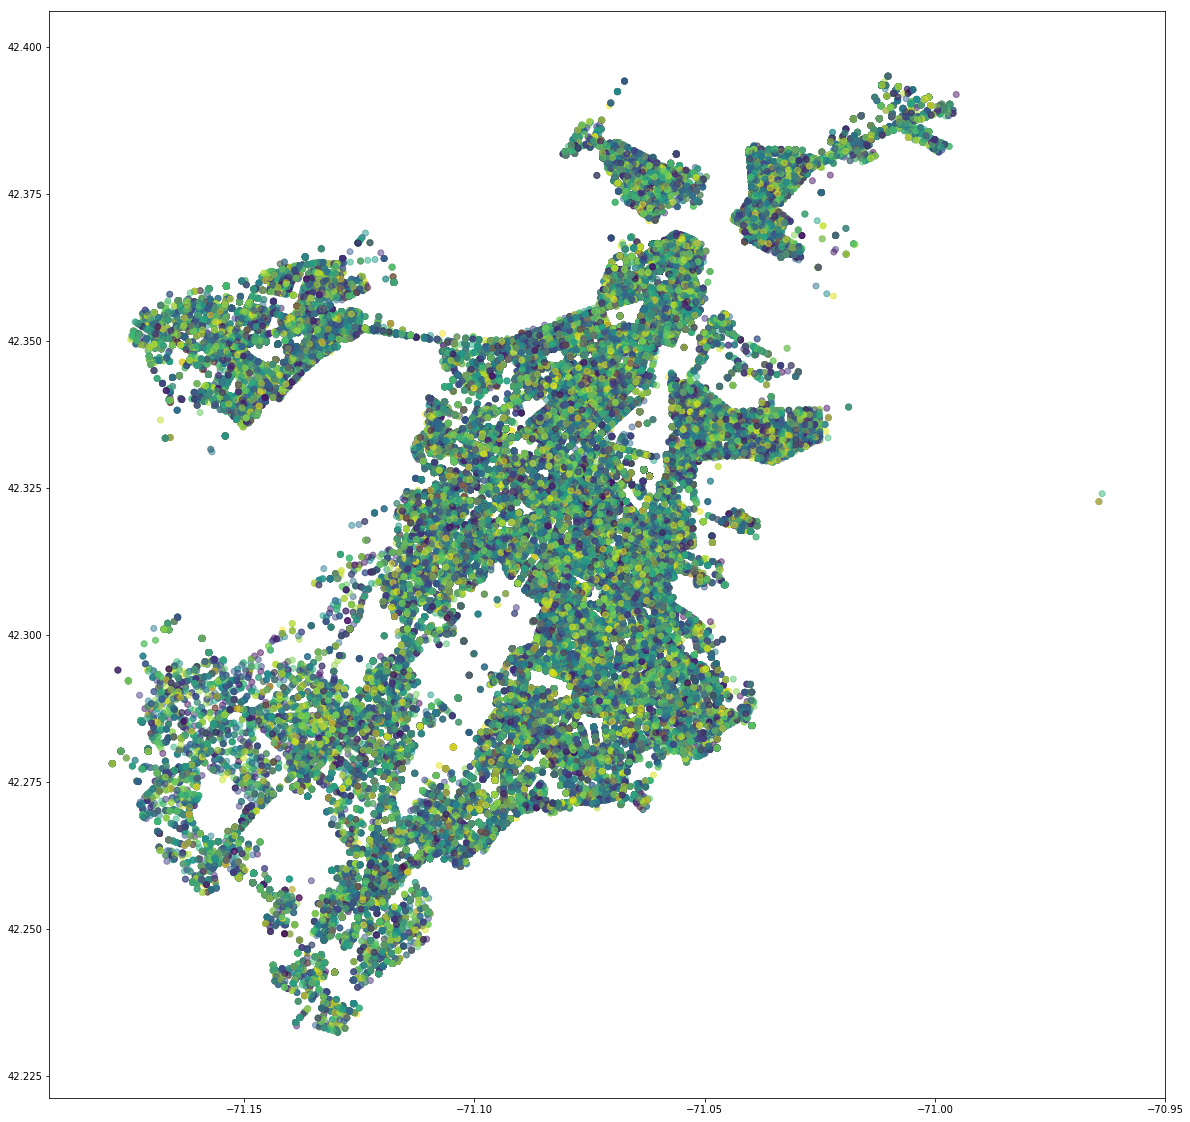

In [156]:
x = location['Long']
y = location['Lat']

colors = np.random.rand(len(location))

plt.figure(figsize=(20,20))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

#### KMeans

In [157]:
from sklearn.cluster import KMeans

In [158]:
X = location
X = X[~np.isnan(X)]

### 2 clusters

In [159]:
#K means Clustering #K means  
def doKmeans(X, nclust):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(X, 2)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

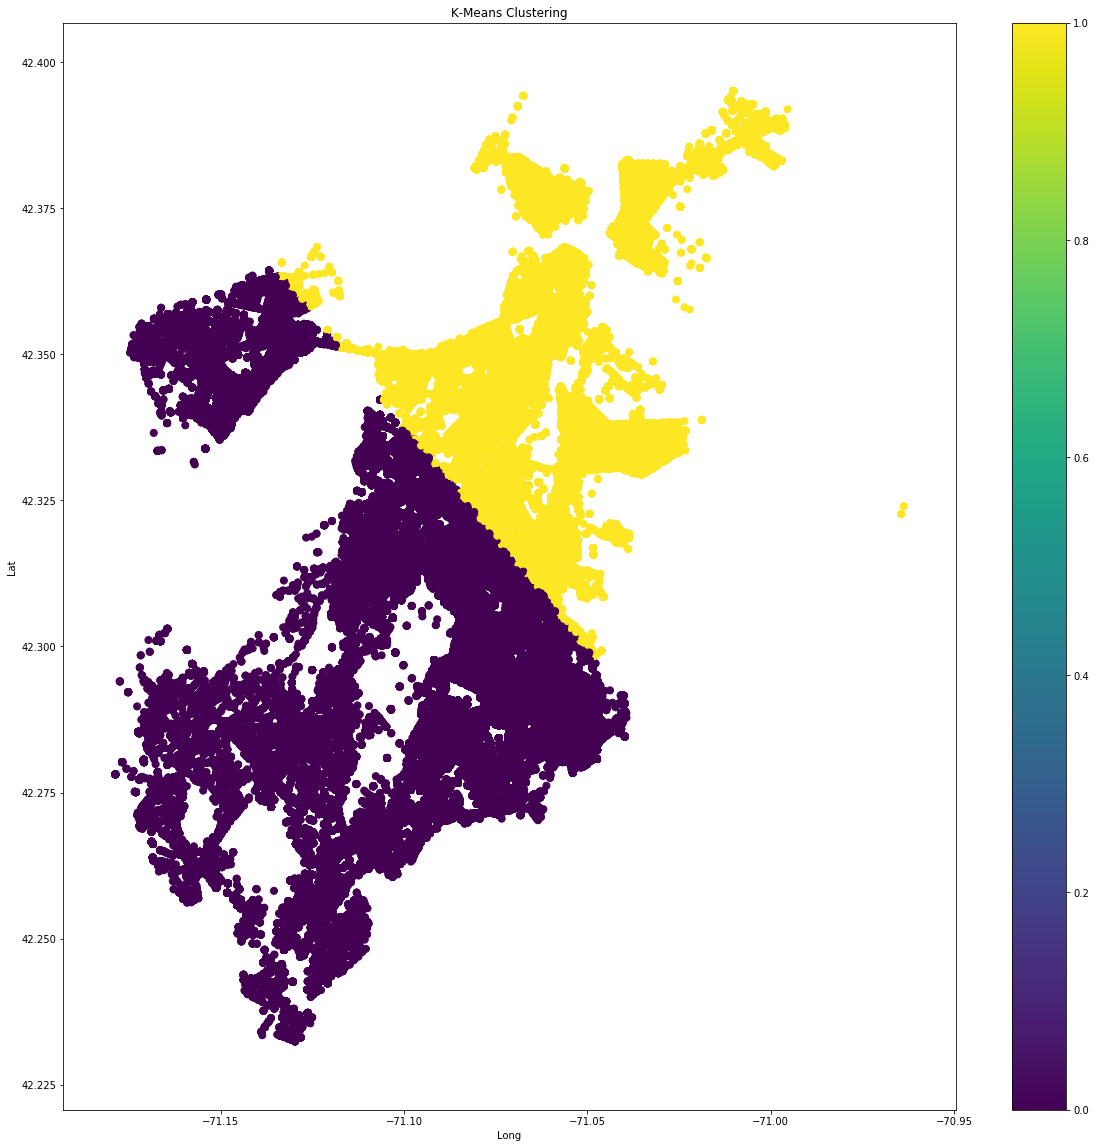

In [160]:
#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

### 3 clusters

In [161]:
X = location
X = X[~np.isnan(X)]

In [162]:
clust_labels, cent = doKmeans(X, 3)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

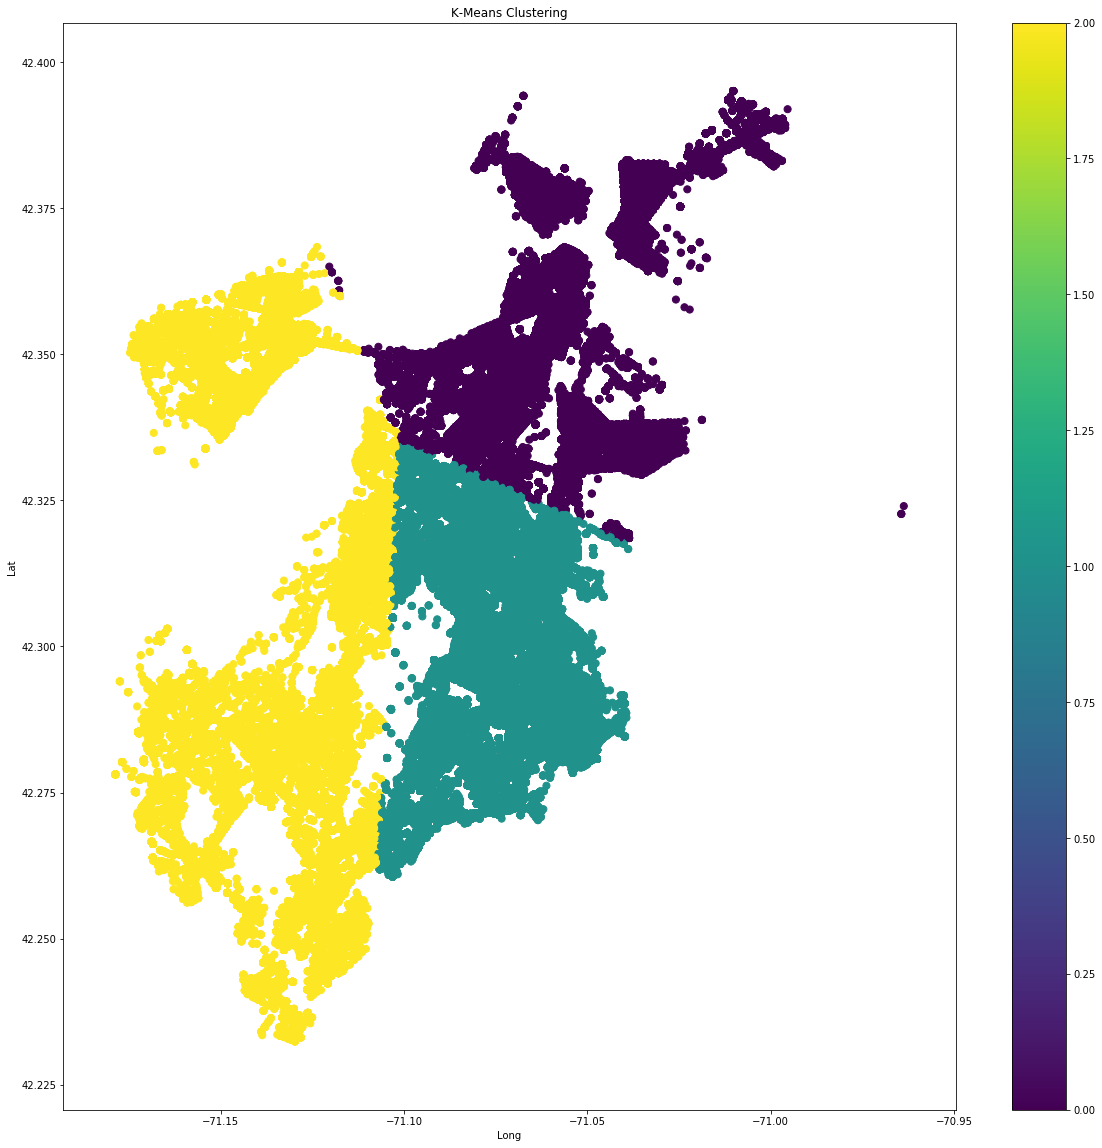

In [163]:
#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

### 5 clusters

In [164]:
X = location
X = X[~np.isnan(X)]

In [165]:
clust_labels, cent = doKmeans(X, 5)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

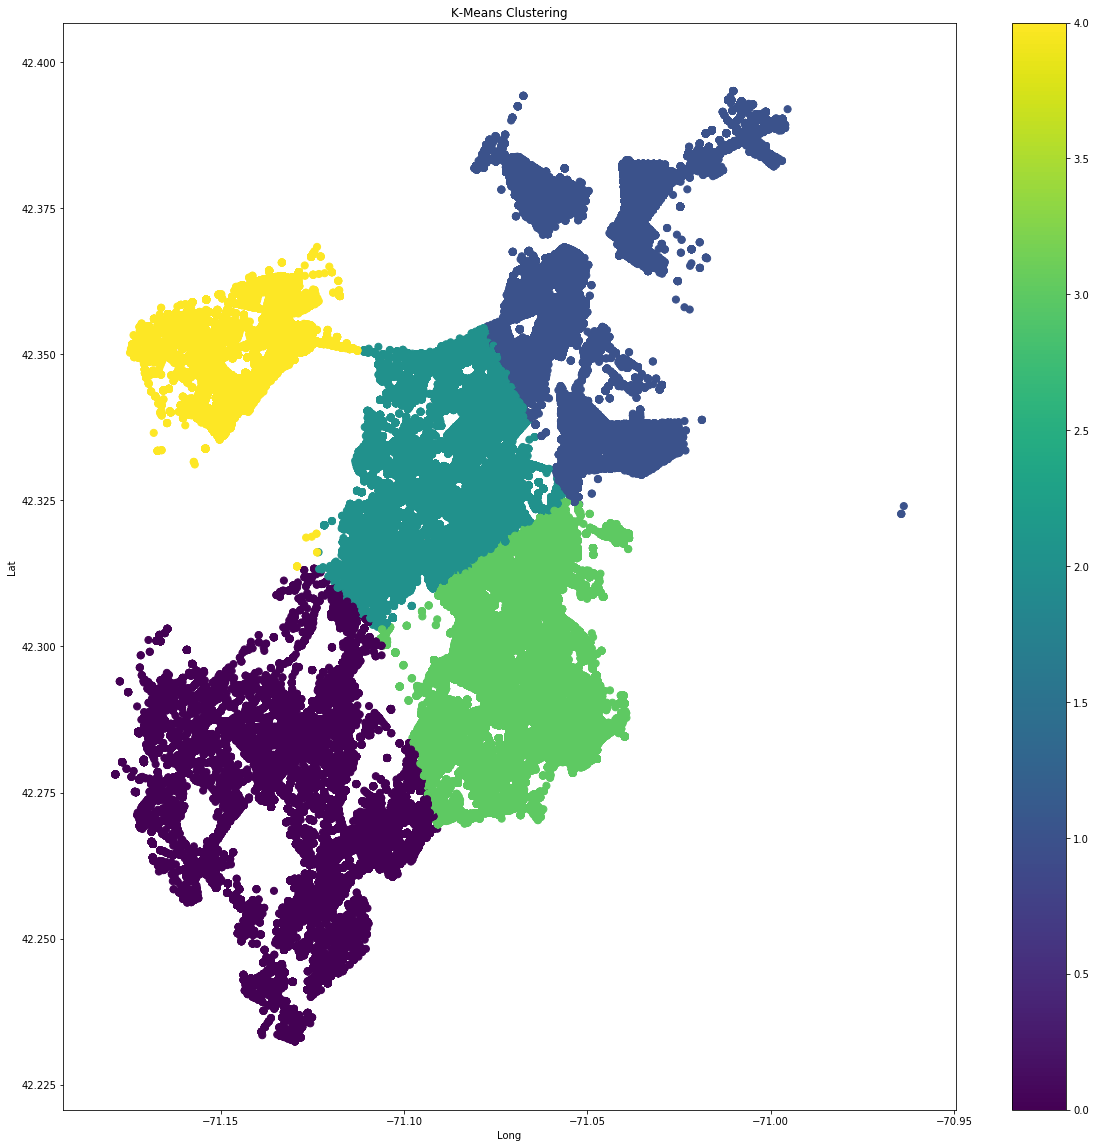

In [166]:
#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

### 10 clusters

In [167]:
X = location
X = X[~np.isnan(X)]

In [168]:
clust_labels, cent = doKmeans(X, 10)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

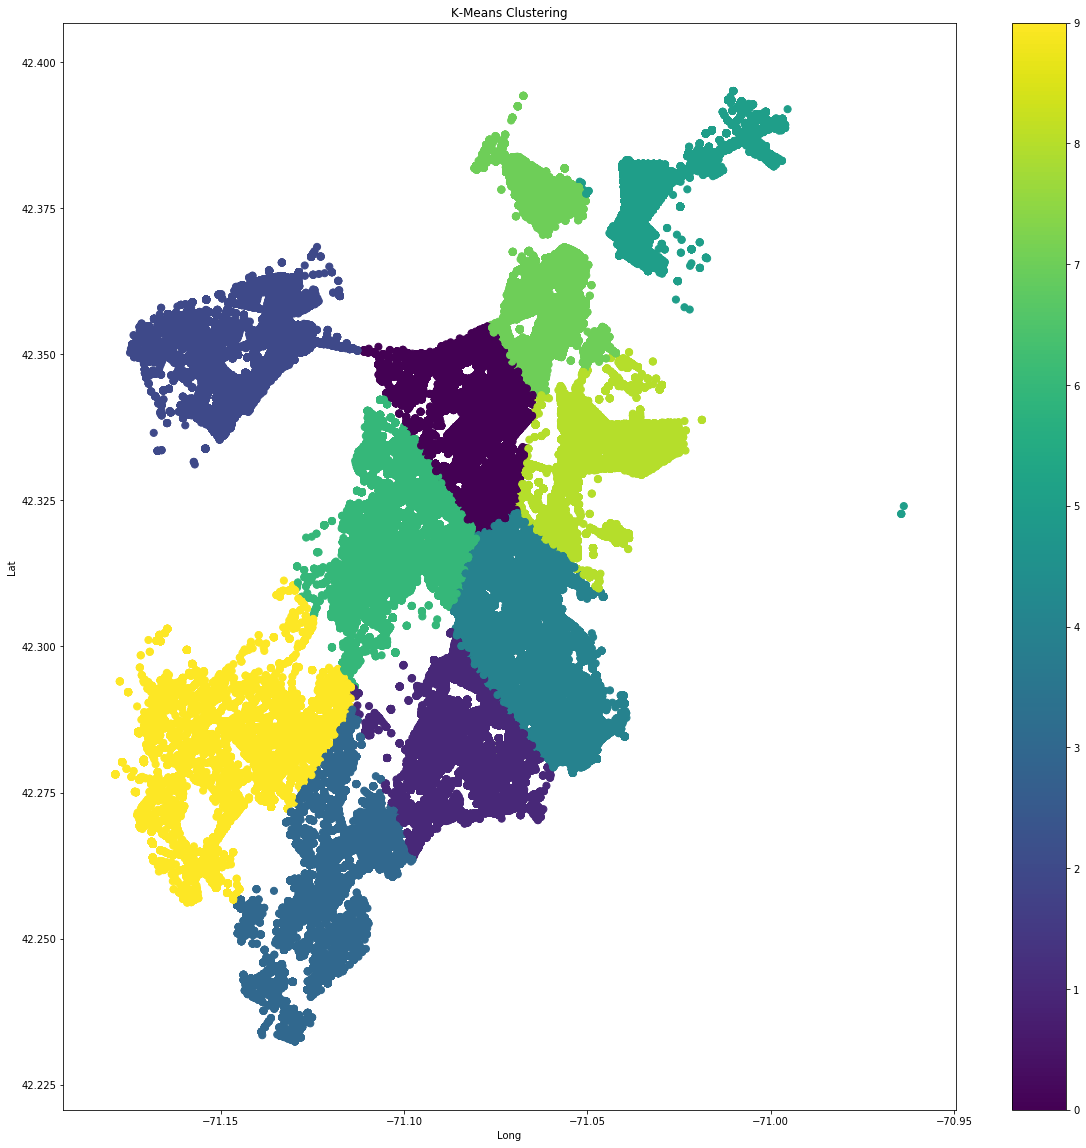

In [169]:
#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

### 6.5. Clustering with location and OFFENSE_CODE

In [170]:
df_clus = df[['OFFENSE_CODE','Long','Lat']]

In [171]:
df_clus = df_clus.loc[(df_clus['Lat'] > 40) & (df_clus['Long'] < -60)]

In [172]:
#df_clus['REPORTING_AREA'] = pd.to_numeric(df_model['REPORTING_AREA'], errors='coerce')

In [173]:
df_clus = df_clus.dropna()

In [174]:
df_clus.describe()

OFFENSE_CODE           Long            Lat
count  283871.000000  283871.000000  283871.000000
mean     2295.901392     -71.082827      42.322323
std      1182.925196       0.029764       0.031873
min       111.000000     -71.178674      42.232413
25%       802.000000     -71.097189      42.297555
50%      2907.000000     -71.077551      42.325600
75%      3201.000000     -71.062563      42.348624
max      3831.000000     -70.963676      42.395042

### 2 clus

In [175]:
X = df_clus
X = X[~np.isnan(X)]

In [176]:
clust_labels, cent = doKmeans(X, 2)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

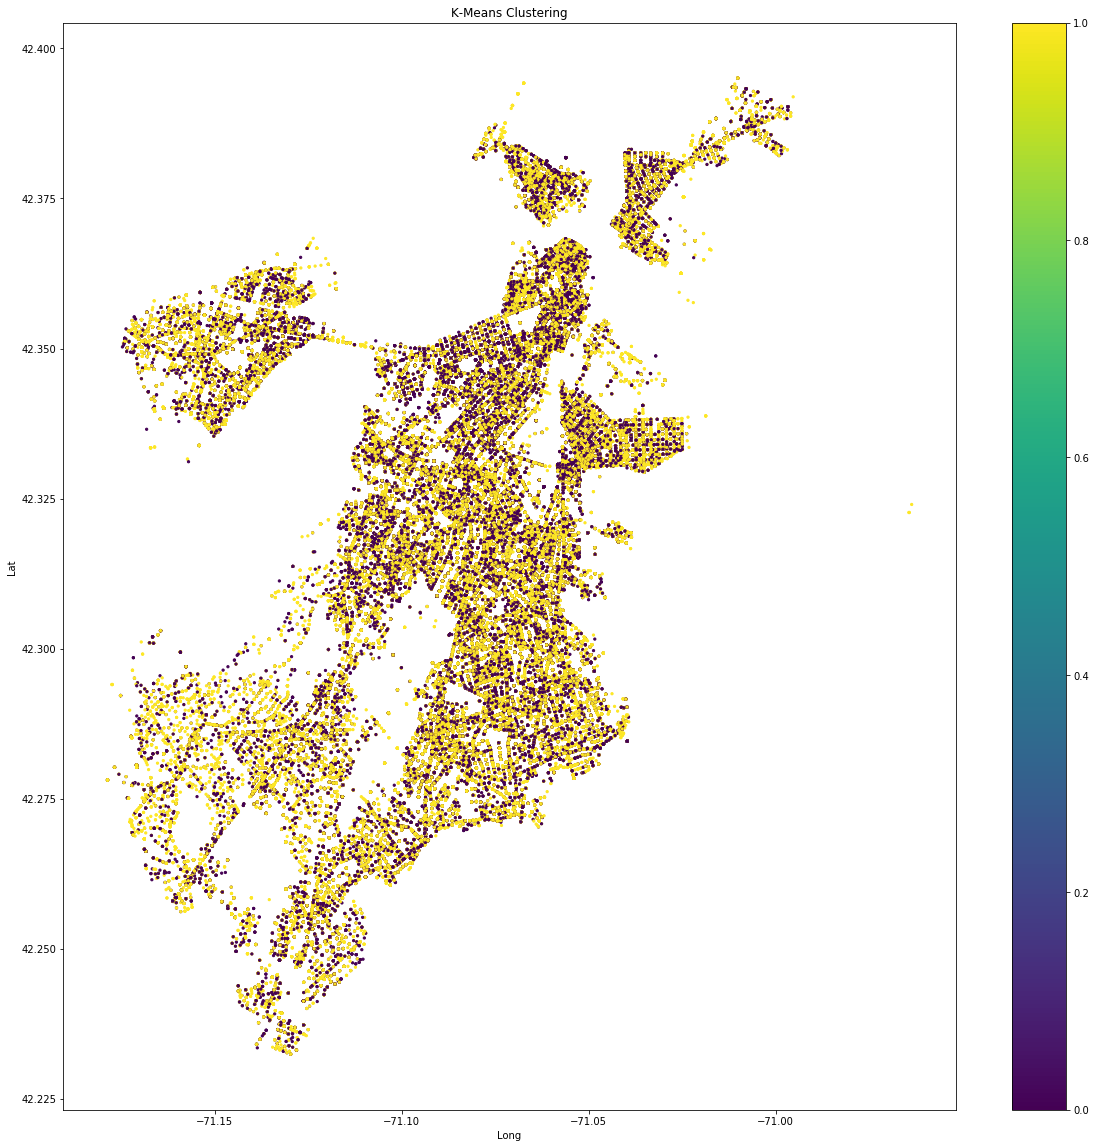

In [177]:
#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=5)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

 ### 6.6. Clustering with location and month

In [178]:
df_clus = df[['MONTH','Long','Lat']]

In [179]:
df_clus = df_clus.loc[(df_clus['Lat'] > 40) & (df_clus['Long'] < -60)]

In [180]:
df_clus = df_clus.dropna()

In [181]:
X = df_clus
X = X[~np.isnan(X)]

In [182]:
clust_labels, cent = doKmeans(X, 2)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

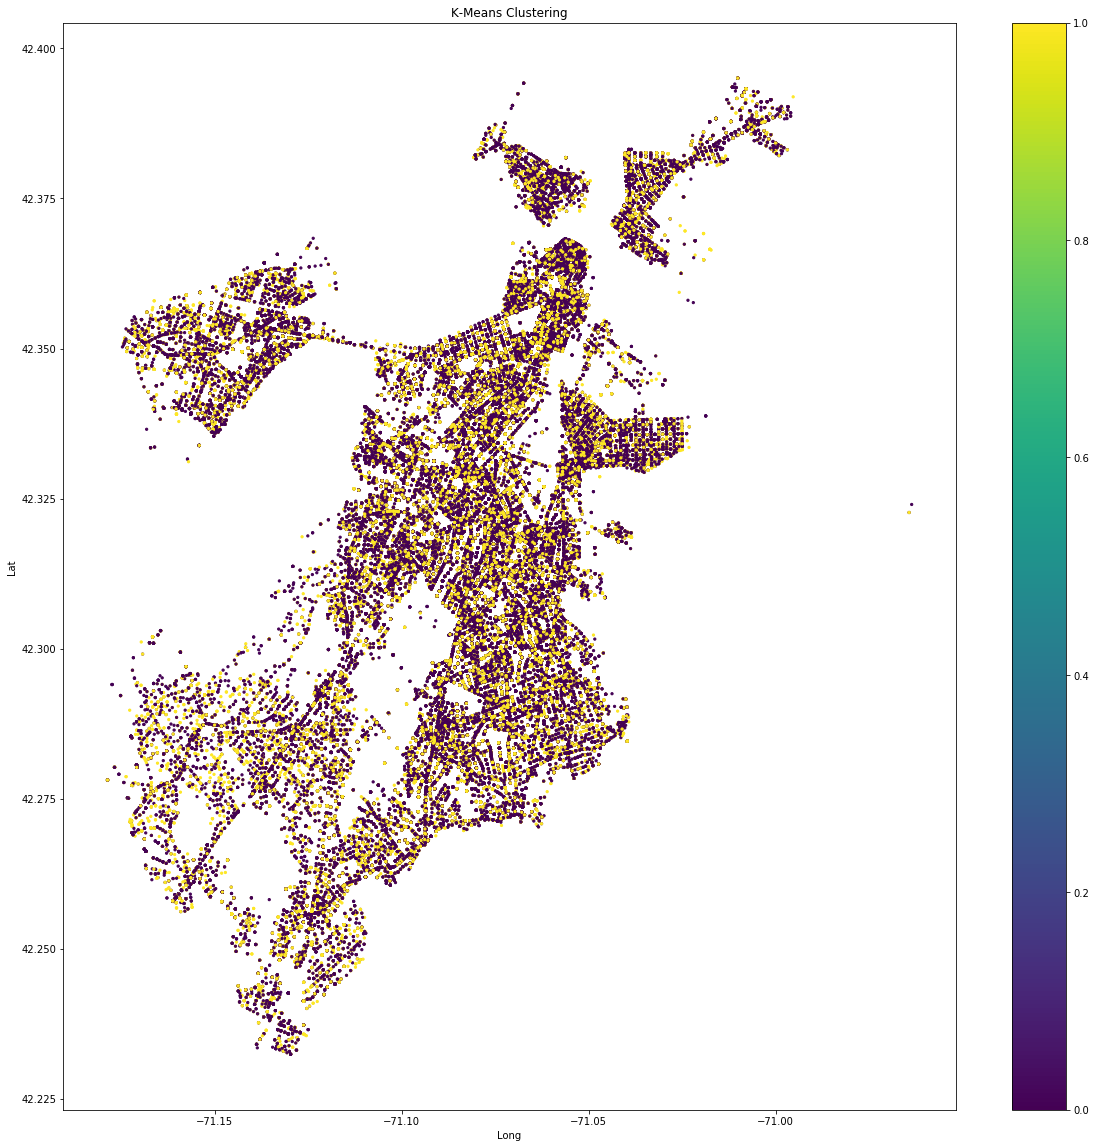

In [183]:
#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=5)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)